<a href="https://colab.research.google.com/github/lapatradaa/shap/blob/main/Copy_of_SHAP_multi_Gender(ITC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SHAP

## Import data set (เรียกใช้ CSV)

In [ ]:
import pandas as pd
import shutil

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## เลือกข้อมูล ทำ Background data ของ data train

In [ ]:
dt_train = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_train_Predict.csv')
dt_train

Unnamed: 0  Age(year) Gender Folder_type Folder_name  \
0              0          7      F      Normal        Both   
1              1          7      F      Normal        Both   
2              2          7      F      Normal        Both   
3              3          7      F      Normal        Both   
4              4          7      F      Normal        Both   
...          ...        ...    ...         ...         ...   
4184        4184         25      M      Normal          Rt   
4185        4185         25      M      Normal          Rt   
4186        4186         25      M      Normal          Rt   
4187        4187         25      M      Normal          Rt   
4188        4188         25      M      Normal          Rt   

                                              Path_Name    Filename  Fold  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V1.jpg     2   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV1.jpg     4   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V2.jpg    10   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV2.jpg     9   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V3.jpg    10   
...                                                 ...         ...   ...   
4184  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J375.jpg     3   
4185  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J437.jpg     5   
4186  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J480.jpg     5   
4187  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J491.jpg     6   
4188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J496.jpg     5   

      Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0                0         Female     7.107492              7.0   
1                0         Female     7.020138              7.0   
2                0         Female     6.975561              7.0   
3                0         Female     6.938187              7.0   
4                0         Female     6.916692              7.0   
...            ...            ...          ...              ...   
4184             1           Male    25.299234             25.0   
4185             1           Male    24.729193             25.0   
4186             1           Male    24.564425             25.0   
4187             1           Male    24.113144             24.0   
4188             1           Male    24.704357             25.0   

      Gender_predict Gender_predict_str  Gender_predict_int  
0           0.000003             Female                 0.0  
1           0.000025             Female                 0.0  
2           0.000808             Female                 0.0  
3           0.000107             Female                 0.0  
4           0.000014             Female                 0.0  
...              ...                ...                 ...  
4184        0.999988               Male                 1.0  
4185        0.999987               Male                 1.0  
4186        1.000000               Male                 1.0  
4187        1.000000               Male                 1.0  
4188        1.000000               Male                 1.0  

[4189 rows x 15 columns]

In [ ]:
df = dt_train.drop(dt_train.columns[0], axis=1)
df

Age(year) Gender Folder_type Folder_name  \
0             7      F      Normal        Both   
1             7      F      Normal        Both   
2             7      F      Normal        Both   
3             7      F      Normal        Both   
4             7      F      Normal        Both   
...         ...    ...         ...         ...   
4184         25      M      Normal          Rt   
4185         25      M      Normal          Rt   
4186         25      M      Normal          Rt   
4187         25      M      Normal          Rt   
4188         25      M      Normal          Rt   

                                              Path_Name    Filename  Fold  \
0     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V1.jpg     2   
1     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV1.jpg     4   
2     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V2.jpg    10   
3     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV2.jpg     9   
4     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V3.jpg    10   
...                                                 ...         ...   ...   
4184  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J375.jpg     3   
4185  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J437.jpg     5   
4186  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J480.jpg     5   
4187  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J491.jpg     6   
4188  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    J496.jpg     5   

      Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0                0         Female     7.107492              7.0   
1                0         Female     7.020138              7.0   
2                0         Female     6.975561              7.0   
3                0         Female     6.938187              7.0   
4                0         Female     6.916692              7.0   
...            ...            ...          ...              ...   
4184             1           Male    25.299234             25.0   
4185             1           Male    24.729193             25.0   
4186             1           Male    24.564425             25.0   
4187             1           Male    24.113144             24.0   
4188             1           Male    24.704357             25.0   

      Gender_predict Gender_predict_str  Gender_predict_int  
0           0.000003             Female                 0.0  
1           0.000025             Female                 0.0  
2           0.000808             Female                 0.0  
3           0.000107             Female                 0.0  
4           0.000014             Female                 0.0  
...              ...                ...                 ...  
4184        0.999988               Male                 1.0  
4185        0.999987               Male                 1.0  
4186        1.000000               Male                 1.0  
4187        1.000000               Male                 1.0  
4188        1.000000               Male                 1.0  

[4189 rows x 14 columns]

In [ ]:
# นับรูป
# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = dt_train['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = dt_train[(dt_train['Age(year)'] == age) & (dt_train['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (111, 15)
Age 8: (116, 15)
Age 9: (122, 15)
Age 10: (114, 15)
Age 11: (114, 15)
Age 12: (119, 15)
Age 13: (106, 15)
Age 14: (110, 15)
Age 15: (110, 15)
Age 16: (112, 15)
Age 17: (107, 15)
Age 18: (104, 15)
Age 19: (107, 15)
Age 20: (105, 15)
Age 21: (107, 15)
Age 22: (97, 15)
Age 23: (108, 15)
Age 24: (104, 15)
Age 25: (96, 15)
Age 7: (114, 15)
Age 8: (116, 15)
Age 9: (120, 15)
Age 10: (116, 15)
Age 11: (117, 15)
Age 12: (117, 15)
Age 13: (108, 15)
Age 14: (113, 15)
Age 15: (117, 15)
Age 16: (118, 15)
Age 17: (112, 15)
Age 18: (128, 15)
Age 19: (115, 15)
Age 20: (99, 15)
Age 21: (100, 15)
Age 22: (105, 15)
Age 23: (101, 15)
Age 24: (91, 15)
Age 25: (113, 15)


In [ ]:
# เลือกรูปจาก train มาทำ bg data
import pandas as pd
import random

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'Age(year)': dt_train['Age(year)'],
    'Gender': dt_train['Gender'],
    'Folder_type': dt_train['Folder_type'],
    'Folder_name': dt_train['Folder_name'],
    'Path_Name': dt_train['Path_Name'],
    'Filename': dt_train['Filename'],
}

df = pd.DataFrame(data)

# Calculate the desired number of rows per unique age
desired_per_age = 2660 // (25 - 7 + 1)

# Initialize a list to store selected rows
selected_rows = []

# Iterate through unique age values
for age in range(7, 26):
    # Get all rows with the current age
    age_rows = df[df['Age(year)'] == age]

    # Randomly shuffle the rows for this age
    age_rows = age_rows.sample(frac=1, random_state=42)

    # Determine the number of rows to select for each gender
    rows_per_gender = desired_per_age // 2

    # Select rows for both "Male" and "Female" genders
    selected_male_rows = age_rows[age_rows['Gender'] == 'M'].head(rows_per_gender)
    selected_female_rows = age_rows[age_rows['Gender'] == 'F'].head(rows_per_gender)

    # Append the selected rows to the list
    selected_rows.extend([selected_male_rows, selected_female_rows])

# Concatenate the selected rows for each age into a final DataFrame
selected_dft = pd.concat(selected_rows)

# Now, selected_df contains 950 rows with an approximately even distribution of ages from 7 to 25
# and an equal number of "Male" and "Female" samples for each age.


In [ ]:
selected_dft

Age(year) Gender Folder_type Folder_name  \
184           7      M      Normal        Both   
120           7      M      Normal        Both   
207           7      M      Normal        Both   
148           7      M      Normal        Both   
214           7      M      Normal          Lt   
...         ...    ...         ...         ...   
4050         25      F      Normal        Both   
4044         25      F      Normal        Both   
4024         25      F      Normal        Both   
4020         25      F      Normal        Both   
4003         25      F      Normal        Both   

                                              Path_Name       Filename  
184   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV116.jpg  
120   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV13.jpg  
207   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipVV244.jpg  
148   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV50.jpg  
214   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipVV28.jpg  
...                                                 ...            ...  
4050  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J245.jpg  
4044  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J218.jpg  
4024  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J148.jpg  
4020  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J144.jpg  
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipJ64.jpg  

[2660 rows x 6 columns]

In [ ]:
#selected_dft.to_csv('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Bg_train.csv')  # Setting index=False to avoid saving the row numbers as a column

In [ ]:
# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'M')].shape
    print(f"Age {age}: {shape}")

# Get unique age values
unique_ages = selected_dft['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'F' gender
for age in unique_ages:
    shape = selected_dft[(selected_dft['Age(year)'] == age) & (selected_dft['Gender'] == 'F')].shape
    print(f"Age {age}: {shape}")

Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)
Age 7: (70, 6)
Age 8: (70, 6)
Age 9: (70, 6)
Age 10: (70, 6)
Age 11: (70, 6)
Age 12: (70, 6)
Age 13: (70, 6)
Age 14: (70, 6)
Age 15: (70, 6)
Age 16: (70, 6)
Age 17: (70, 6)
Age 18: (70, 6)
Age 19: (70, 6)
Age 20: (70, 6)
Age 21: (70, 6)
Age 22: (70, 6)
Age 23: (70, 6)
Age 24: (70, 6)
Age 25: (70, 6)


## เลือกข้อมูล ทำ Background data ของ data train

In [ ]:
df_test_gender = pd.read_csv (r'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/Table_test_Predict.csv')
df_test_gender = df_test_gender.iloc[:,1:]
print(df_test_gender.shape)
df_test_gender

(943, 13)


Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[943 rows x 13 columns]

In [ ]:
# เลือกเฉพาะ row ที่ทายถูก
c = df_test_gender[((df_test_gender['Gender_predict_str'] == 'Female') & (df_test_gender['Gender'] == 'F')) | ((df_test_gender['Gender_predict_str'] == 'Male') & (df_test_gender['Gender'] == 'M'))]
c

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int  
0      5.141945e-03             Female                 0.0  
1      4.618836e-02             Female                 0.0  
2      6.406498e-03             Female                 0.0  
3      2.021052e-05             Female                 0.0  
4      2.091009e-02             Female                 0.0  
..              ...                ...                 ...  
938    1.800820e-05             Female                 0.0  
939    1.193671e-01             Female                 0.0  
940    1.212668e-03             Female                 0.0  
941    3.044503e-09             Female                 0.0  
942    9.307945e-06             Female                 0.0  

[824 rows x 13 columns]

In [ ]:
# ทำค่า Prob
c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)

<ipython-input-12-dfbf4747a020>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['prob'] = c.apply(lambda row: 1 - row['Gender_predict'] if row['Gender'] == 'F' else row['Gender_predict'], axis=1)


In [ ]:
c

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
938         25      F    Abnormal          Rt   
939         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
939  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J145.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
938             0         Female    21.686228             22.0   
939             0         Female    21.118502             21.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int      prob  
0      5.141945e-03             Female                 0.0  0.994858  
1      4.618836e-02             Female                 0.0  0.953812  
2      6.406498e-03             Female                 0.0  0.993594  
3      2.021052e-05             Female                 0.0  0.999980  
4      2.091009e-02             Female                 0.0  0.979090  
..              ...                ...                 ...       ...  
938    1.800820e-05             Female                 0.0  0.999982  
939    1.193671e-01             Female                 0.0  0.880633  
940    1.212668e-03             Female                 0.0  0.998787  
941    3.044503e-09             Female                 0.0  1.000000  
942    9.307945e-06             Female                 0.0  0.999991  

[824 rows x 14 columns]

In [ ]:
c['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [ ]:
# Select rows where 'prob' is greater than 0.9
d = c[c['prob'] > 0.90]

# Display the selected rows
d

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
937         25      F    Abnormal          Rt   
938         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
937  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J86.jpg   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
937             0         Female    19.068132             19.0   
938             0         Female    21.686228             22.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int      prob  
0      5.141945e-03             Female                 0.0  0.994858  
1      4.618836e-02             Female                 0.0  0.953812  
2      6.406498e-03             Female                 0.0  0.993594  
3      2.021052e-05             Female                 0.0  0.999980  
4      2.091009e-02             Female                 0.0  0.979090  
..              ...                ...                 ...       ...  
937    9.307945e-06             Female                 0.0  0.999991  
938    1.800820e-05             Female                 0.0  0.999982  
940    1.212668e-03             Female                 0.0  0.998787  
941    3.044503e-09             Female                 0.0  1.000000  
942    9.307945e-06             Female                 0.0  0.999991  

[753 rows x 14 columns]

In [ ]:
# check ว่าในเเต่ละช่วงอายุมีกี่คน
# Get unique age values
unique_ages = d['Age(year)'].unique()

# Iterate through unique ages and calculate shape for 'M' gender
for age in unique_ages:
    shape = d[(d['Age(year)'] == age)].shape
    print(f"Age {age}: {shape}")

Age 7: (35, 14)
Age 8: (37, 14)
Age 9: (32, 14)
Age 10: (31, 14)
Age 11: (38, 14)
Age 12: (35, 14)
Age 13: (39, 14)
Age 14: (26, 14)
Age 15: (38, 14)
Age 16: (41, 14)
Age 17: (48, 14)
Age 18: (47, 14)
Age 19: (43, 14)
Age 20: (44, 14)
Age 21: (42, 14)
Age 22: (44, 14)
Age 23: (48, 14)
Age 24: (47, 14)
Age 25: (38, 14)


In [ ]:
# Select the first 2048 rows
selected_test = d
selected_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
937         25      F    Abnormal          Rt   
938         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                             Path_Name     Filename  \
0    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   
..                                                 ...          ...   
937  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      J86.jpg   
938  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J132.jpg   
940  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J149.jpg   
941  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J158.jpg   
942  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...     J177.jpg   

     Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0               0         Female     7.423399              7.0   
1               0         Female     7.415316              7.0   
2               0         Female     7.548301              8.0   
3               0         Female     7.492433              7.0   
4               0         Female     7.343049              7.0   
..            ...            ...          ...              ...   
937             0         Female    19.068132             19.0   
938             0         Female    21.686228             22.0   
940             0         Female    19.639433             20.0   
941             0         Female    21.359797             21.0   
942             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int      prob  
0      5.141945e-03             Female                 0.0  0.994858  
1      4.618836e-02             Female                 0.0  0.953812  
2      6.406498e-03             Female                 0.0  0.993594  
3      2.021052e-05             Female                 0.0  0.999980  
4      2.091009e-02             Female                 0.0  0.979090  
..              ...                ...                 ...       ...  
937    9.307945e-06             Female                 0.0  0.999991  
938    1.800820e-05             Female                 0.0  0.999982  
940    1.212668e-03             Female                 0.0  0.998787  
941    3.044503e-09             Female                 0.0  1.000000  
942    9.307945e-06             Female                 0.0  0.999991  

[753 rows x 14 columns]

## Create background

In [ ]:
def process_input(dt_train):
    # Initialize an empty list to store background data
    background_data = []

    # Ensure 'Path_Name' column exists in the DataFrame
    if 'Path_Name' not in dt_train.columns:
        raise ValueError("The 'Path_Name' column does not exist in the DataFrame.")

    # Loop to preprocess and create the background data
    for i in range(len(dt_train)):
        print(f"Processing image {i+1}/{len(dt_train)}")
        # Get the image path from the DataFrame
        image_path = dt_train['Path_Name'].iloc[i]  # Use .iloc to access rows by integer index
        # Load and preprocess the image
        image = load_img(image_path, target_size=(224, 224))  # Adjust target_size
        preprocessed_image = img_to_array(image) / 255.0  # Normalize pixel values

        # Add the preprocessed image to the background_data list
        background_data.append(preprocessed_image)

    return background_data

### data train

In [ ]:
import pandas as pd
import numpy as np
import torch
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
sdf_train = selected_dft.sort_values(by='Age(year)', kind='mergesort')
sdf_train

Age(year) Gender Folder_type Folder_name  \
184           7      M      Normal        Both   
120           7      M      Normal        Both   
207           7      M      Normal        Both   
148           7      M      Normal        Both   
214           7      M      Normal          Lt   
...         ...    ...         ...         ...   
4050         25      F      Normal        Both   
4044         25      F      Normal        Both   
4024         25      F      Normal        Both   
4020         25      F      Normal        Both   
4003         25      F      Normal        Both   

                                              Path_Name       Filename  
184   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      VV116.jpg  
120   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV13.jpg  
207   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipVV244.jpg  
148   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       VV50.jpg  
214   /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...   FlipVV28.jpg  
...                                                 ...            ...  
4050  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J245.jpg  
4044  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J218.jpg  
4024  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J148.jpg  
4020  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...       J144.jpg  
4003  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...    FlipJ64.jpg  

[2660 rows x 6 columns]

In [ ]:
sdf_train['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [ ]:
background_train = process_input(sdf_train)

Processing image 1/2660
Processing image 2/2660
Processing image 3/2660
Processing image 4/2660
Processing image 5/2660
Processing image 6/2660
Processing image 7/2660
Processing image 8/2660
Processing image 9/2660
Processing image 10/2660
Processing image 11/2660
Processing image 12/2660
Processing image 13/2660
Processing image 14/2660
Processing image 15/2660
Processing image 16/2660
Processing image 17/2660
Processing image 18/2660
Processing image 19/2660
Processing image 20/2660
Processing image 21/2660
Processing image 22/2660
Processing image 23/2660
Processing image 24/2660
Processing image 25/2660
Processing image 26/2660
Processing image 27/2660
Processing image 28/2660
Processing image 29/2660
Processing image 30/2660
Processing image 31/2660
Processing image 32/2660
Processing image 33/2660
Processing image 34/2660
Processing image 35/2660
Processing image 36/2660
Processing image 37/2660
Processing image 38/2660
Processing image 39/2660
Processing image 40/2660
Processin

### data test

In [ ]:
print(selected_test.shape)
selected_test.head()

(753, 14)


Age(year) Gender Folder_type Folder_name  \
0          7      F      Normal        Both   
1          7      F      Normal        Both   
2          7      F      Normal        Both   
3          7      F      Normal        Both   
4          7      F      Normal        Both   

                                           Path_Name     Filename  \
0  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V69.jpg   
1  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV69.jpg   
2  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V70.jpg   
3  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...  FlipV70.jpg   
4  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...      V74.jpg   

   Gender_Class Gender_Predict  Age_predict  Age_predict_int  Gender_predict  \
0             0         Female     7.423399              7.0        0.005142   
1             0         Female     7.415316              7.0        0.046188   
2             0         Female     7.548301              8.0        0.006406   
3             0         Female     7.492433              7.0        0.000020   
4             0         Female     7.343049              7.0        0.020910   

  Gender_predict_str  Gender_predict_int      prob  
0             Female                 0.0  0.994858  
1             Female                 0.0  0.953812  
2             Female                 0.0  0.993594  
3             Female                 0.0  0.999980  
4             Female                 0.0  0.979090

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
sdf_test = selected_test.sort_values(by='Age(year)', kind='mergesort')
sdf_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
937         25      F    Abnormal          Rt   
938         25      F    Abnormal          Rt   
940         25      F    Abnormal          Rt   
941         25      F    Abnormal          Rt   
942         25      F    Abnormal          Rt   

                                                                                               Path_Name  \
0        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg   
2        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg   
4        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg   
..                                                                                                   ...   
937     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J86.jpg   
938    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J132.jpg   
940    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J149.jpg   
941    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J158.jpg   
942    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J177.jpg   

        Filename  Gender_Class Gender_Predict  Age_predict  Age_predict_int  \
0        V69.jpg             0         Female     7.423399              7.0   
1    FlipV69.jpg             0         Female     7.415316              7.0   
2        V70.jpg             0         Female     7.548301              8.0   
3    FlipV70.jpg             0         Female     7.492433              7.0   
4        V74.jpg             0         Female     7.343049              7.0   
..           ...           ...            ...          ...              ...   
937      J86.jpg             0         Female    19.068132             19.0   
938     J132.jpg             0         Female    21.686228             22.0   
940     J149.jpg             0         Female    19.639433             20.0   
941     J158.jpg             0         Female    21.359797             21.0   
942     J177.jpg             0         Female    19.068132             19.0   

     Gender_predict Gender_predict_str  Gender_predict_int      prob  
0      5.141945e-03             Female                 0.0  0.994858  
1      4.618836e-02             Female                 0.0  0.953812  
2      6.406498e-03             Female                 0.0  0.993594  
3      2.021052e-05             Female                 0.0  0.999980  
4      2.091009e-02             Female                 0.0  0.979090  
..              ...                ...                 ...       ...  
937    9.307945e-06             Female                 0.0  0.999991  
938    1.800820e-05             Female                 0.0  0.999982  
940    1.212668e-03             Female                 0.0  0.998787  
941    3.044503e-09             Female                 0.0  1.000000  
942    9.307945e-06             Female                 0.0  0.999991  

[753 rows x 14 columns]

In [ ]:
sdf_test['Age(year)'].unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25])

In [ ]:
background_test = process_input(sdf_test)

Processing image 1/753
Processing image 2/753
Processing image 3/753
Processing image 4/753
Processing image 5/753
Processing image 6/753
Processing image 7/753
Processing image 8/753
Processing image 9/753
Processing image 10/753
Processing image 11/753
Processing image 12/753
Processing image 13/753
Processing image 14/753
Processing image 15/753
Processing image 16/753
Processing image 17/753
Processing image 18/753
Processing image 19/753
Processing image 20/753
Processing image 21/753
Processing image 22/753
Processing image 23/753
Processing image 24/753
Processing image 25/753
Processing image 26/753
Processing image 27/753
Processing image 28/753
Processing image 29/753
Processing image 30/753
Processing image 31/753
Processing image 32/753
Processing image 33/753
Processing image 34/753
Processing image 35/753
Processing image 36/753
Processing image 37/753
Processing image 38/753
Processing image 39/753
Processing image 40/753
Processing image 41/753
Processing image 42/753
P

In [ ]:
print(type(background_test))

<class 'list'>


##**แปลง Bg dataเป็น array เพื่อใช้ในการคำนวณค่า SHAP**

In [ ]:
background_train_array = np.array(background_train)
background_test_array = np.array(background_test)

In [ ]:
print(len(background_train_array))
print(background_train_array.shape)
print(background_test_array.shape)

2660
(2660, 224, 224, 3)
(753, 224, 224, 3)


# คำนวณ SHAP Values

## load model

### Import

In [ ]:
import os
import numpy as np
import pandas as pd
#import efficientnet.tfkeras
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0

### กำหนดค่าพารามิเตอร์ (ตามที่กำหนดใน Model)


In [ ]:
batch_size = 16
width = 224
height = 224
epochs = 250 # รอบในการเทรน
dropout_rate = 0.2
input_shape = (height, width, 3)

### Clone Efficient

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


### Load Model

In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
# Check the number of output units in the final layer
num_output_units = model.layers[-1].output_shape[-1]

# Check if it's a binary classification model (2 output units) or not
if num_output_units == 2:
    print("This is a binary classification model.")
else:
    print("This is not a binary classification model.")

This is not a binary classification model.


## SHAP & YOLO

### SHAP

In [ ]:
!pip install shap==0.44.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
print(background_test_array.shape)
print(background_test_array[[10]].shape) # ภาพที่ 10

(753, 224, 224, 3)
(1, 224, 224, 3)


In [ ]:
model.output_names

['prediction_layer', 'prediction_layer2']

In [ ]:
model.output_names[0] # age estimation

'prediction_layer'

In [ ]:
model.output_names[1] # gender prediction

'prediction_layer2'

เลือกเฉพาะ Output layer ไปทำการหาความสำคัญ

In [ ]:
import shap
import tensorflow as tf

# Create separate models for each output you want to explain
#AGE
model_layer1 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer').output)
#Gender
model_layer2 = tf.keras.Model(inputs=model.input, outputs=model.get_layer('prediction_layer2').output)


In [ ]:
# Define your explainer for the first output layer (prediction_layer)
#AGE
explainer_layer1 = shap.GradientExplainer(model_layer1, background_train_array)

In [ ]:
# Define your explainer for the second output layer (prediction_layer2)
#Gender
explainer_layer2 = shap.GradientExplainer(model_layer2, background_train_array)

### yolo

In [ ]:
# load YOLO ที่Train มา
# Replace with code to load your trained YOLO model
weights_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/papers/gpt/Yolo_v5/best.pt'

# Load YOLOv5 model from Google Drive
yolo_model = torch.hub.load('ultralytics/yolov5', 'custom', path=weights_path)

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirements ['gitpython>=3.1.30', 'pillow>=10.3.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 268.9 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0

requirements: AutoUpdate success ✅ 9.6s, installed 2 packages: ['gitpython>=3.1.30', 'pillow>=10.3.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-5-9 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7064065 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


#### ทํา non maximum suppression

In [ ]:
import pandas as pd

def compute_iou(boxA, boxB):
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)

    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.1):
    df_nms = pd.DataFrame()
    class_ids = df['class'].unique()

    for class_id in class_ids:
        df_class = df[df['class'] == class_id].copy()

        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        retained_indices = []
        iou_values = []

        for i in range(len(df_class_sorted)):
            if i in retained_indices:
                continue

            retained_indices.append(i)
            iou_values.append(1.0)

            for j in range(i + 1, len(df_class_sorted)):
                if j in retained_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']]
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']]
                iou_value = compute_iou(boxA, boxB)

                if iou_value > iou_threshold:
                    retained_indices.append(j)
                    iou_values.append(iou_value)

        df_nms_class = df_class_sorted.iloc[retained_indices].reset_index(drop=True)

        df_nms_class['iou'] = iou_values

        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms


#### def map box ที่ detectกับ SHAP value

##### pos img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_pos(image_path, df, grayscale_image):
    selected_bboxes = []  #สร้าง list ว่าง มาเก็บกล่องที่มีค่า SHAP เกิน IoU ที่ 0.1
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path) #  เปิดภาพจาก path
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency // plot จากสีเทา ให้เป้นน สีแดง ทับลงไป
    ax.imshow(grayscale_image, cmap='Reds', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():  #df ที่ตัวแบบทนายมาทั้งหมด  จะทำการ loop เก็บค่าตห.จากตาราง
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name, IoU = row['confidence'], row['class'],row['name'], row['iou']

        # Convert coordinates to absolute values // เปลี่ยนจากตห.ของกล่อง ให้ตามขนาดภาพที่ใส่เข้าไป (ม้้ง)
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image //คำนวณบริเวณที่สินใจ
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1]) # แปลงพิกัดกรอบสีเหลี่ยมให้เข้ากับขนาดรูปภาพ โดย *พิกัด กับขนาดของ grayscale_image
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax] # เลือก roi บริเวณที่สนใจ  จากgrayscale_image โดยตัด roi ออกมาเป็น nparray

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1]) #Calculate the percentage ของ pixels ที่ไม่เป็น 0 แล้วหารด้วย pixels ทั้งหมด

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':IoU})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch //สร้างกล่อง
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin), #abs แปลงเป็นพิกัดในหน่วย  pixel ให้ตรงกับขนาดภาพจริง
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='r', # เปลี่ยนสีกล่อง
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}' # ข้อความที่จะ Plot บนกล่อง
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5)) # ตห + สีของตัวอักษร ขนาด front


    # Show the plot
    plt.show()

    return selected_bboxes, value_than_IoU

##### neg img

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np

def plot_bboxes_on_image_neg(image_path, df, grayscale_image):
    selected_bboxes = []
    value_than_IoU = []

    # Load the original image
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get the image dimensions
    image_width, image_height = img.size

    # Create figure and axes
    fig, ax = plt.subplots()

    # Display the original image
    ax.imshow(img)

    # Overlay the grayscale image with transparency
    ax.imshow(grayscale_image, cmap='Blues', alpha=0.6, extent=[0, image_width, image_height, 0])

    # Iterate over rows in the DataFrame
    for index, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        confidence, class_label,class_name, IoU = row['confidence'], row['class'],row['name'], row['iou']

        # Convert coordinates to absolute values
        abs_xmin = xmin * image_width
        abs_ymin = ymin * image_height
        abs_width = (xmax - xmin) * image_width
        abs_height = (ymax - ymin) * image_height

        # Map bounding box to the grayscale image
        # Calculate the region of interest in the grayscale image
        roi_xmin = int(xmin * grayscale_image.shape[1])
        roi_ymin = int(ymin * grayscale_image.shape[0])
        roi_xmax = int(xmax * grayscale_image.shape[1])
        roi_ymax = int(ymax * grayscale_image.shape[0])

        # Extract the region of interest from the grayscale image
        roi = grayscale_image[roi_ymin:roi_ymax, roi_xmin:roi_xmax]

        # Calculate the percentage of nonzero pixels
        nonzero_percentage = np.count_nonzero(roi) / (roi.shape[0] * roi.shape[1])

        # If the percentage of nonzero pixels exceeds 10%, collect the bounding box#เลือกกล่องที่มีค่า shap ในกล่องมากกว่า 10% ของทั้งหมด
        if nonzero_percentage > 0.1:
            # Add bounding box information to the selected_bboxes list
            selected_bboxes.append({'xmin': abs_xmin, 'ymin': abs_ymin,'xmax': abs_xmin + abs_width, 'ymax': abs_ymin + abs_height,
                                    'confidence': confidence, 'class': class_label,'name':class_name, 'iou':IoU})
            value_than_IoU.append(nonzero_percentage)

            # Create a rectangle patch
            rect = patches.Rectangle(
                (abs_xmin, abs_ymin),
                abs_width,
                abs_height,
                linewidth=2,
                edgecolor='b',
                facecolor='none'  # Set facecolor to 'none' for an unfilled rectangle
            )

            # Add the rectangle to the axes
            ax.add_patch(rect)
            # Add confidence and class label as text
            text = f'Class: {class_label}'
            #\nConfidence: {confidence:.2f}'
            plt.text(abs_xmin, abs_ymin - 10, text, color='black', fontsize=8, bbox=dict(facecolor='white', alpha=0.5))


    # Show the plot
    plt.show()

    return selected_bboxes,  value_than_IoU

### 23 Year

### Female

#### เลือกรูปที่ต้องการหาค่า SHAP Value

In [ ]:
sdf_test = sdf_test.reset_index().iloc[:,1:]
sdf_test

Age(year) Gender Folder_type Folder_name  \
0            7      F      Normal        Both   
1            7      F      Normal        Both   
2            7      F      Normal        Both   
3            7      F      Normal        Both   
4            7      F      Normal        Both   
..         ...    ...         ...         ...   
748         25      F    Abnormal          Rt   
749         25      F    Abnormal          Rt   
750         25      F    Abnormal          Rt   
751         25      F    Abnormal          Rt   
752         25      F    Abnormal          Rt   

                                                                                               Path_Name  \
0        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V69.jpg   
1    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV69.jpg   
2        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V70.jpg   
3    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/FlipV70.jpg   
4        /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/7Y/F/Both/V74.jpg   
..                                                                                                   ...   
748     /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J86.jpg   
749    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J132.jpg   
750    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J149.jpg   
751    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J158.jpg   
752    /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Abnormal/25Y/F/Rt/J177.jpg   

     ... Age_predict_int  Gender_predict Gender_predict_str  \
0    ...             7.0    5.141945e-03             Female   
1    ...             7.0    4.618836e-02             Female   
2    ...             8.0    6.406498e-03             Female   
3    ...             7.0    2.021052e-05             Female   
4    ...             7.0    2.091009e-02             Female   
..   ...             ...             ...                ...   
748  ...            19.0    9.307945e-06             Female   
749  ...            22.0    1.800820e-05             Female   
750  ...            20.0    1.212668e-03             Female   
751  ...            21.0    3.044503e-09             Female   
752  ...            19.0    9.307945e-06             Female   

     Gender_predict_int      prob  
0                   0.0  0.994858  
1                   0.0  0.953812  
2                   0.0  0.993594  
3                   0.0  0.999980  
4                   0.0  0.979090  
..                  ...       ...  
748                 0.0  0.999991  
749                 0.0  0.999982  
750                 0.0  0.998787  
751                 0.0  1.000000  
752                 0.0  0.999991  

[753 rows x 14 columns]

In [ ]:
sdf_test[sdf_test['Age(year)']==23]

Age(year) Gender Folder_type Folder_name  \
620         23      F      Normal        Both   
621         23      F      Normal        Both   
622         23      F      Normal        Both   
623         23      F      Normal        Both   
624         23      F      Normal        Both   
625         23      F      Normal        Both   
626         23      F      Normal        Both   
627         23      F      Normal        Both   
628         23      F      Normal        Both   
629         23      F      Normal        Both   
630         23      F      Normal        Both   
631         23      F      Normal        Both   
632         23      F      Normal        Both   
633         23      F      Normal        Both   
634         23      F      Normal          Lt   
635         23      F      Normal          Lt   
636         23      F      Normal          Lt   
637         23      F      Normal          Lt   
638         23      F      Normal          Lt   
639         23      F      Normal          Lt   
640         23      F      Normal          Lt   
641         23      F      Normal          Lt   
642         23      F      Normal          Lt   
643         23      M      Normal        Both   
644         23      M      Normal        Both   
645         23      M      Normal        Both   
646         23      M      Normal        Both   
647         23      M      Normal          Lt   
648         23      M      Normal          Lt   
649         23      M      Normal          Lt   
650         23      M      Normal          Lt   
651         23      M      Normal          Lt   
652         23      M      Normal          Lt   
653         23      M      Normal          Lt   
654         23      M      Normal          Rt   
655         23      M      Normal          Rt   
656         23      M      Normal          Rt   
657         23      M      Normal          Rt   
658         23      M      Normal          Rt   
659         23      M      Normal          Rt   
660         23      M      Normal          Rt   
661         23      M      Normal          Rt   
662         23      M      Normal          Rt   
663         23      M      Normal          Rt   
664         23      M      Normal          Rt   
665         23      M      Normal          Rt   
666         23      M      Normal          Rt   
667         23      M    Abnormal          Rt   

                                                                                                 Path_Name  \
620      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg   
621  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE244.jpg   
622      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg   
623  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE280.jpg   
624      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E282.jpg   
625  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE282.jpg   
626      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E283.jpg   
627  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg   
628      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E284.jpg   
629  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE284.jpg   
630      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E287.jpg   
631  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE287.jpg   
632      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E297.jpg   
633  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut

In [ ]:
from PIL import Image
Image_E244_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg')
Image_E244_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg'

Image_E280_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg')
Image_E280_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg'

Image_FlipE283_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg')
Image_FlipE283_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg'

Image_FlipE109_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg')
Image_FlipE109_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg'

Image_FlipE150_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg')
Image_FlipE150_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg'

In [ ]:
sdf_test.reset_index().iloc[620]

index                                                                                                               620
Age(year)                                                                                                            23
Gender                                                                                                                F
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg
Filename                                                                                                       E244.jpg
Gender_Class                                                                                                          0
Gender_Predict                          

In [ ]:
sdf_test.reset_index().iloc[622]

index                                                                                                               622
Age(year)                                                                                                            23
Gender                                                                                                                F
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg
Filename                                                                                                       E280.jpg
Gender_Class                                                                                                          0
Gender_Predict                          

In [ ]:
sdf_test.reset_index().iloc[627] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                   627
Age(year)                                                                                                                23
Gender                                                                                                                    F
Folder_type                                                                                                          Normal
Folder_name                                                                                                            Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg
Filename                                                                                                       FlipE283.jpg
Gender_Class                                                                                                              0
Gender_P

In [ ]:
sdf_test.reset_index().iloc[634] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 634
Age(year)                                                                                                              23
Gender                                                                                                                  F
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE109.jpg
Filename                                                                                                     FlipE109.jpg
Gender_Class                                                                                                            0
Gender_Predict          

In [ ]:
sdf_test.reset_index().iloc[642] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 642
Age(year)                                                                                                              23
Gender                                                                                                                  F
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Lt/FlipE150.jpg
Filename                                                                                                     FlipE150.jpg
Gender_Class                                                                                                            0
Gender_Predict          

#### YOLO (detect ตห)

In [ ]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_E244_23Y_F = yolo_model(Image_E244_23Y_F) # results = ผลจากการทำนาย
df_E244_23Y_F = results_E244_23Y_F.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index
#ภาพ2
results_E280_23Y_F = yolo_model(Image_E280_23Y_F)
df_E280_23Y_F = results_E280_23Y_F.pandas().xyxyn[0]
#ภาพ3
results_FlipE283_23Y_F = yolo_model(Image_FlipE283_23Y_F)
df_FlipE283_23Y_F = results_FlipE283_23Y_F.pandas().xyxyn[0]
#ภาพ4
results_FlipE109_23Y_F = yolo_model(Image_FlipE109_23Y_F)
df_FlipE109_23Y_F = results_FlipE109_23Y_F.pandas().xyxyn[0]
#ภาพ5
results_FlipE150_23Y_F = yolo_model(Image_FlipE150_23Y_F)
df_FlipE150_23Y_F= results_FlipE150_23Y_F.pandas().xyxyn[0]

WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
 results_E244_23Y_F.pandas().xyxyn[0]

xmin      ymin      xmax      ymax  confidence  class  \
0   0.413439  0.615943  0.556066  0.787112    0.930287     13   
1   0.333462  0.604812  0.462590  0.736952    0.922186     11   
2   0.465990  0.654569  0.642072  0.826653    0.914115      5   
3   0.193908  0.266715  0.296632  0.423032    0.899091      0   
4   0.696205  0.013361  0.966492  0.439450    0.893783      7   
5   0.566833  0.691746  0.695932  0.853802    0.893508      6   
6   0.438069  0.405748  0.534253  0.576854    0.892715      8   
7   0.198947  0.583434  0.326849  0.809255    0.890187      3   
8   0.411414  0.335667  0.522426  0.463951    0.887042     15   
9   0.672965  0.446699  0.741796  0.670621    0.878894     19   
10  0.576031  0.445847  0.651139  0.640695    0.875600     18   
11  0.728715  0.467336  0.790549  0.682866    0.865949      1   
12  0.627572  0.448424  0.702481  0.656386    0.853336     14   
13  0.501566  0.431012  0.601061  0.615965    0.853164     10   
14  0.658466  0.698930  0.751686  0.887884    0.836295     12   
15  0.798112  0.701447  0.855561  0.874561    0.814257      4   
16  0.715516  0.709485  0.783657  0.911774    0.790082      9   
17  0.762520  0.701504  0.826238  0.881954    0.783498      2   
18  0.207205  0.419249  0.261574  0.569407    0.777768     16   
19  0.779796  0.469655  0.845445  0.691550    0.758797     17   
20  0.729539  0.475068  0.789609  0.685365    0.277026     17   

                         name  
0          Lower Second Molar  
1           Lower Third Molar  
2           Lower First Molar  
3                     Condyle  
4                       Nasal  
5       Lower Second Premolar  
6          Upper Second Molar  
7            Mandibular angle  
8           Upper Third Molar  
9                Upper Canine  
10      Upper Second Premolar  
11      Upper Lateral Incisor  
12       Upper First Premolar  
13          Upper First Molar  
14       Lower First Premolar  
15      Lower Central Incisor  
16               Lower Canine  
17      Lower Lateral Incisor  
18  Posterior border of Ramus  
19      Upper Central Incisor  
20      Upper Central Incisor

In [ ]:
results_FlipE150_23Y_F

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 1 Lower Central Incisor, 1 Lower First Molar, 1 Lower Second Premolar, 1 Nasal, 1 Upper Second Molar, 2 Lower Canines, 1 Upper First Molar, 1 Lower Third Molar, 1 Lower First Premolar, 1 Lower Second Molar, 1 Upper First Premolar, 1 Upper Third Molar, 1 Posterior border of Ramus, 1 Upper Central Incisor, 1 Upper Second Premolar, 1 Upper Canine
Speed: 7.6ms pre-process, 10.4ms inference, 2.6ms NMS per image at shape (1, 3, 544, 640)

##### NMS

In [ ]:
df_E244_23Y_F_filtered_nms = nms_per_class(df_E244_23Y_F,iou_threshold=0.5)
df_E280_23Y_F_filtered_nms = nms_per_class(df_E280_23Y_F,iou_threshold=0.5)
df_FlipE283_23Y_F_filtered_nms = nms_per_class(df_FlipE283_23Y_F,iou_threshold=0.5)
df_FlipE109_23Y_F_filtered_nms = nms_per_class(df_FlipE109_23Y_F,iou_threshold=0.5)
df_FlipE150_23Y_F_filtered_nms = nms_per_class(df_FlipE150_23Y_F,iou_threshold=0.5)

#### SHAP values

In [ ]:
explainer_layer2

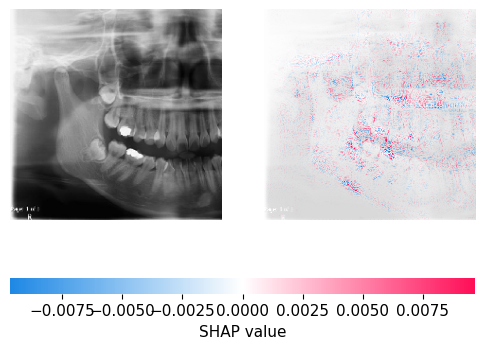

In [ ]:
shap_values_E244_23Y_F = explainer_layer2.shap_values(background_test_array[[620]])
%matplotlib inline
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

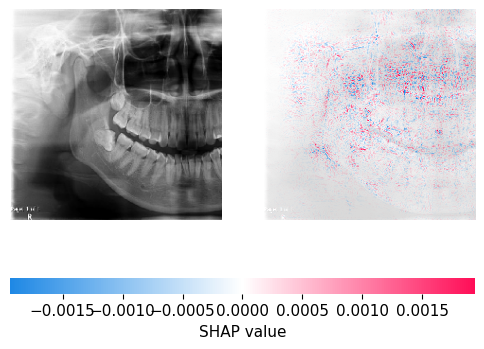

In [ ]:
shap_values_E280_23Y_F = explainer_layer2.shap_values(background_test_array[[622]])
%matplotlib inline
shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

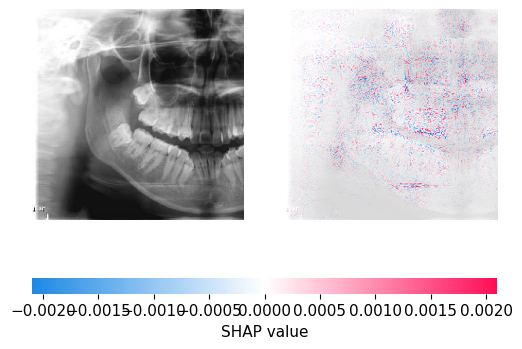

In [ ]:
shap_values_FlipE283_23Y_F = explainer_layer2.shap_values(background_test_array[[627]])
%matplotlib inline
shap.image_plot(shap_values_FlipE283_23Y_F, background_test_array[[627]])

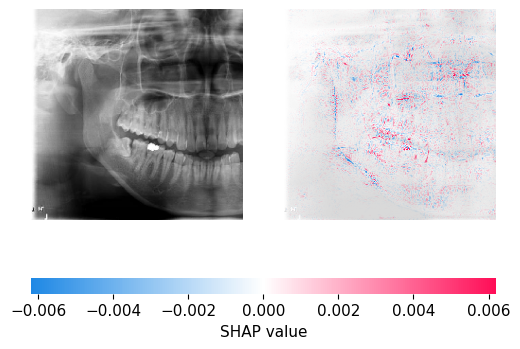

In [ ]:
shap_values_FlipE109_23Y_F = explainer_layer2.shap_values(background_test_array[[634]])
%matplotlib inline
shap.image_plot(shap_values_FlipE109_23Y_F, background_test_array[[634]])

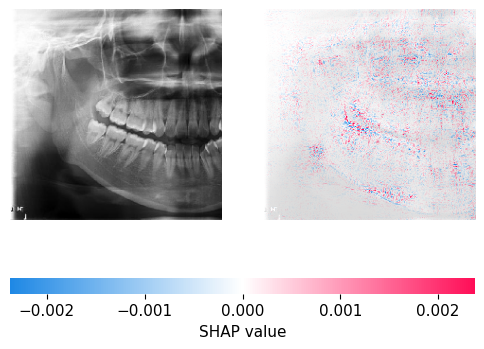

In [ ]:
shap_values_FlipE150_23Y_F = explainer_layer2.shap_values(background_test_array[[642]])
%matplotlib inline
shap.image_plot(shap_values_FlipE150_23Y_F, background_test_array[[642]])

#### convert shap value from RGB to grayscale image

In [ ]:
type(shap_values_FlipE109_23Y_F)

list

#### E244_23Y_F

In [ ]:
#E244_23Y_F
data= [np.array(shap_values_E244_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
grayscale_neg_thresholded

array([[          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       ...,
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0],
       [          0,           0,           0, ...,           0,           0,           0]])

In [ ]:
import numpy as np

total_sum = np.sum(grayscale_neg_thresholded)
print("Total Sum:", total_sum)

# Calculating the mean of all values in the array
mean_value = np.mean(grayscale_neg_thresholded)
print("Mean Value:", mean_value)


Total Sum: 71.16386275245225
Mean Value: 0.0014182848922284009


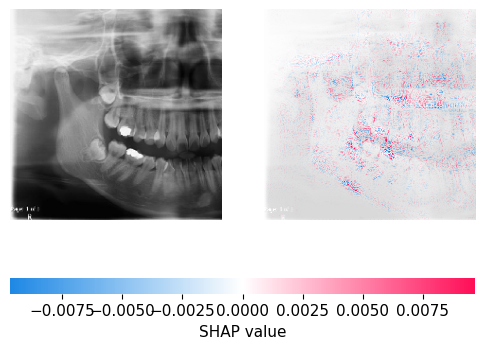

In [ ]:
shap.image_plot(shap_values_E244_23Y_F, background_test_array[[620]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
shap_values_E244_23Y_F

[array([[[[-2.4009e-06,  2.7483e-05, -8.8143e-06],
          [ 1.1218e-05,   4.456e-05, -1.8485e-05],
          [-1.0703e-05,  7.4821e-05,  -1.929e-05],
          ...,
          [ 2.9479e-06, -0.00015696,  2.0314e-05],
          [ 6.1936e-05, -0.00016322,  7.1151e-06],
          [ 2.1991e-05, -0.00014064, -9.0631e-06]],
 
         [[-9.5692e-06, -6.5246e-07, -1.8111e-05],
          [ 4.7476e-06,  8.5589e-06, -2.8097e-05],
          [-2.4291e-05,  4.5256e-05, -1.3078e-05],
          ...,
          [-3.6466e-05, -6.1432e-05,  6.7491e-05],
          [-3.8855e-05, -0.00011737,  7.4838e-05],
          [-3.1534e-05, -0.00015274,  3.0386e-05]],
 
         [[ 5.1195e-06,  3.1254e-05, -3.0104e-05],
          [ 1.6349e-05,  3.1332e-05, -7.1288e-05],
          [ 3.6071e-06,  6.0492e-05, -7.2956e-05],
          ...,
          [-7.2878e-05,  0.00012129,  0.00018384],
          [-0.00015658, -0.00018635,  0.00015153],
          [ -0.0001184, -0.00013898,  9.7333e-05]],
 
         ...,
 
         [[-

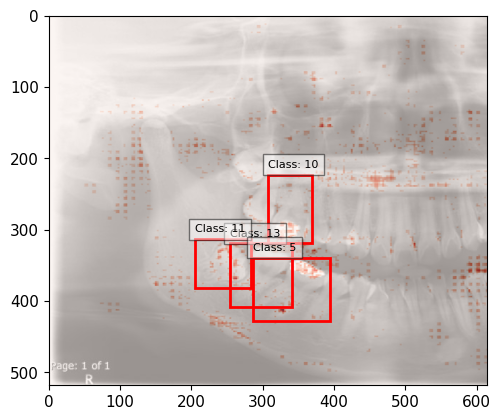

In [ ]:
selected_bboxes_E244_23Y_F_pos = plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E244_23Y_F_pos[0])

xmin        ymin        xmax        ymax  confidence  class  \
0  253.851403  319.058512  341.424546  407.724200    0.930287     13   
1  204.745430  313.292382  284.030266  381.741201    0.922186     11   
2  286.117645  339.066572  394.232404  428.206194    0.914115      5   
3  307.961410  223.264033  369.051592  319.069720    0.853164     10   

                 name  iou  
0  Lower Second Molar  1.0  
1   Lower Third Molar  1.0  
2   Lower First Molar  1.0  
3   Upper First Molar  1.0

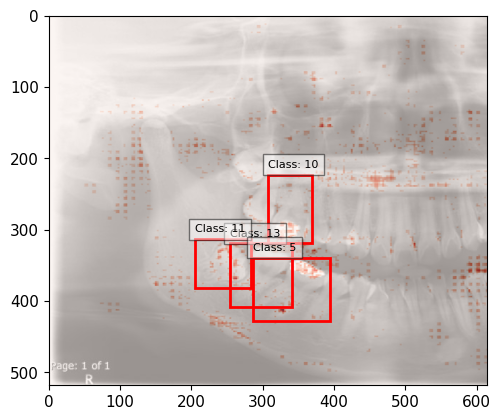

([{'xmin': 253.85140305757523,
   'ymin': 319.0585124492645,
   'xmax': 341.42454624176025,
   'ymax': 407.7242000102997,
   'confidence': 0.9302874803543091,
   'class': 13,
   'name': 'Lower Second Molar',
   'iou': 1.0},
  {'xmin': 204.74543005228043,
   'ymin': 313.292382478714,
   'xmax': 284.03026551008224,
   'ymax': 381.74120128154755,
   'confidence': 0.922186017036438,
   'class': 11,
   'name': 'Lower Third Molar',
   'iou': 1.0},
  {'xmin': 286.1176446676254,
   'ymin': 339.06657218933105,
   'xmax': 394.2324044704437,
   'ymax': 428.2061941623688,
   'confidence': 0.9141151905059814,
   'class': 5,
   'name': 'Lower First Molar',
   'iou': 1.0},
  {'xmin': 307.9614098072052,
   'ymin': 223.26403313875198,
   'xmax': 369.0515921115875,
   'ymax': 319.0697201490402,
   'confidence': 0.8531637191772461,
   'class': 10,
   'name': 'Upper First Molar',
   'iou': 1.0}],
 [0.15224358974358973,
  0.15517241379310345,
  0.10650887573964497,
  0.14745011086474502])

In [ ]:
plot_bboxes_on_image_pos(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_pos_thresholded)

In [ ]:
selected_bboxes_E244_23Y_F_pos[1]

[0.15224358974358973,
 0.15517241379310345,
 0.10650887573964497,
 0.14745011086474502]

###หา iou

In [ ]:
def calculate_iou(box1, box2):
    # Calculate the (x, y)-coordinates of the intersection rectangle
    xA = max(box1['xmin'], box2['xmin'])
    yA = max(box1['ymin'], box2['ymin'])
    xB = min(box1['xmax'], box2['xmax'])
    yB = min(box1['ymax'], box2['ymax'])

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    box1Area = (box1['xmax'] - box1['xmin']) * (box1['ymax'] - box1['ymin'])
    box2Area = (box2['xmax'] - box2['xmin']) * (box2['ymax'] - box2['ymin'])

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(box1Area + box2Area - interArea)
    return iou

# Ground truth and detected box
ground_truth_box = {'xmin': 0.413439, 'ymin': 0.615943, 'xmax': 0.556066, 'ymax': 0.787112}
detected_box = {'xmin': 253.85140305757523, 'ymin': 319.0585124492645, 'xmax': 341.42454624176025, 'ymax': 407.7242000102997}

# The ground truth box seems to be normalized to image dimensions (values between 0 and 1).
# We need to know the actual image dimensions to scale these values correctly.
# Assuming image dimensions based on detected box coordinates (width ~600, height ~500)
image_width = 600
image_height = 500

# Scale the ground truth box
scaled_ground_truth_box = {
    'xmin': ground_truth_box['xmin'] * image_width,
    'ymin': ground_truth_box['ymin'] * image_height,
    'xmax': ground_truth_box['xmax'] * image_width,
    'ymax': ground_truth_box['ymax'] * image_height
}

# Calculate IoU
iou = calculate_iou(scaled_ground_truth_box, detected_box)
iou


0.6499955533958193

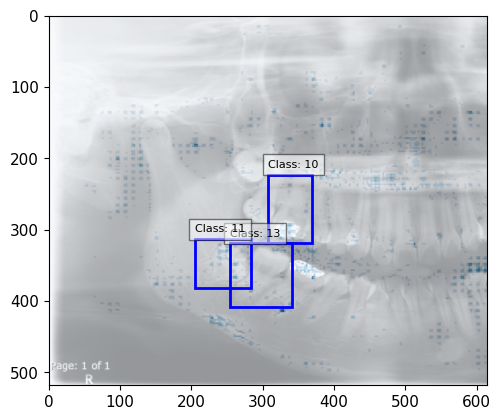

In [ ]:
selected_bboxes_E244_23Y_F_neg = plot_bboxes_on_image_neg(Image_E244_23Y_F_path, df_E244_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E244_23Y_F_neg[0])

xmin        ymin        xmax        ymax  confidence  class  \
0  253.851403  319.058512  341.424546  407.724200    0.930287     13   
1  204.745430  313.292382  284.030266  381.741201    0.922186     11   
2  307.961410  223.264033  369.051592  319.069720    0.853164     10   

                 name  iou  
0  Lower Second Molar  1.0  
1   Lower Third Molar  1.0  
2   Upper First Molar  1.0

In [ ]:
selected_bboxes_E244_23Y_F_neg[1]

[0.12980769230769232, 0.1528735632183908, 0.12084257206208426]

#### E280_23Y_F

In [ ]:
#E280_23Y_F
data= [np.array(shap_values_E280_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [295]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

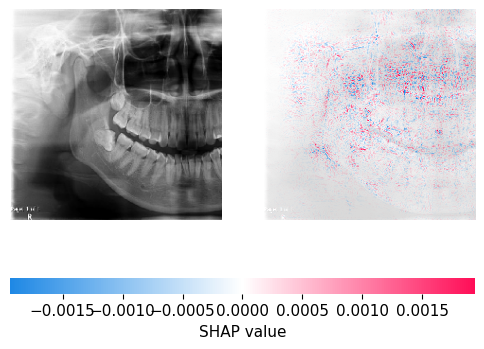

In [ ]:
shap.image_plot(shap_values_E280_23Y_F, background_test_array[[622]])

In [296]:
shap_values_E280_23Y_F

[array([[[[ 1.1995e-05,  1.2332e-05,  1.3828e-05],
          [ 9.5106e-06,  2.1631e-05,  2.3237e-05],
          [-1.6191e-05, -5.6374e-06,  1.9137e-05],
          ...,
          [-4.8918e-06,  2.2758e-05,  8.9997e-06],
          [-7.8791e-06,  2.3179e-05,  1.9235e-05],
          [-9.5994e-06,  4.6831e-06,  2.6218e-05]],
 
         [[-1.2896e-05, -3.3432e-05,  5.9021e-06],
          [-2.5158e-05, -2.6367e-05,  1.6601e-05],
          [-3.1965e-05,  8.8687e-06,  2.5375e-05],
          ...,
          [-1.7581e-05, -1.9268e-05,   6.828e-06],
          [-3.1502e-05, -4.0837e-05,  1.0343e-05],
          [-2.6781e-05, -3.8251e-05,  1.8712e-05]],
 
         [[ 3.9445e-05, -2.1515e-05,  1.8346e-05],
          [ 2.5257e-05, -3.1244e-05,  2.5977e-05],
          [ 4.2147e-05, -7.4702e-05,  1.7437e-05],
          ...,
          [  0.0002208,  4.2115e-05, -7.7091e-05],
          [ 0.00023464, -6.1479e-05, -0.00010886],
          [ 0.00023496,  -9.108e-05, -0.00014267]],
 
         ...,
 
         [[-

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

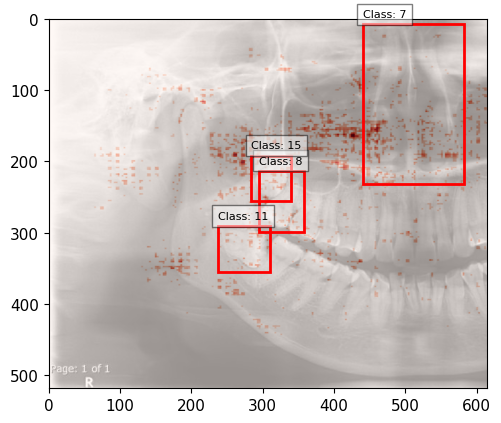

In [ ]:
selected_bboxes_E280_23Y_F_pos = plot_bboxes_on_image_pos(Image_E280_23Y_F_path, df_E280_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E280_23Y_F_pos[0])

xmin        ymin        xmax        ymax  confidence  class  \
0  236.695343  290.763547  309.928915  355.339473    0.922571     11   
1  294.389374  213.171515  358.350446  298.902530    0.917285      8   
2  440.287448    7.844324  581.963315  231.269573    0.916526      7   
3  283.981902  191.998364  340.139653  255.737803    0.861424     15   

                 name  iou  
0   Lower Third Molar  1.0  
1  Upper Second Molar  1.0  
2               Nasal  1.0  
3   Upper Third Molar  1.0

In [ ]:
a = selected_bboxes_E280_23Y_F_pos[1]

In [ ]:
a

[0.10846560846560846,
 0.1245593419506463,
 0.11558287073750992,
 0.14991181657848324]

In [ ]:
for i in a:
  print(i)


0.10846560846560846
0.1245593419506463
0.11558287073750992
0.14991181657848324


In [ ]:
Image_E280_23Y_F = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg')
Image_E280_23Y_F_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg'

In [319]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# โหลดภาพจาก Google Drive
img_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg'
img = Image.open(img_path)
img_array = np.array(img)

# DataFrame จากข้อมูลที่คุณให้มา
data = {
    'name': ['Lower Third Molar', 'Upper Second Molar', 'Nasal', 'Upper Third Molar'],
    'xmin': [236.695343, 294.389374, 440.287448, 283.981902],
    'xmax': [309.928915, 358.350446, 581.963315, 340.139653],
    'ymin': [290.763547, 213.171515, 7.844324, 191.998364],
    'ymax': [355.339473, 298.902530, 231.269573, 255.737803]
}


df = pd.DataFrame(data)

# ฟังก์ชันสำหรับสกัดพิกเซล
def extract_pixels(image_array, df):
    extracted_data = {}
    for _, row in df.iterrows():
        # สกัดพิกเซลจากอาร์เรย์ภาพ
        pixels = image_array[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax'])]
        extracted_data[row['name']] = pixels
    return extracted_data

# สกัดข้อมูลพิกเซล
extracted_pixels = extract_pixels(img_array, df)

# แสดงผลภาพสำหรับแต่ละ class
for name, pixels in extracted_pixels.items():
    plt.figure()
    plt.title(f"Pixels for {name}")
    plt.imshow(pixels)
    plt.colorbar()
    plt.show()

In [317]:
shap_values_E280_23Y_F

array([[[    0.89986,     0.16251,     0.40567],
        [    0.81011,     0.73943,     0.57095],
        [    0.52585,     0.60136,     0.61361],
        ...,
        [    0.37439,     0.88955,     0.24388],
        [    0.39354,     0.39167,     0.12134],
        [    0.65787,     0.60945,     0.31288]],

       [[   0.057638,     0.99003,     0.77064],
        [    0.41722,     0.85583,     0.29963],
        [    0.58832,     0.24037,     0.97333],
        ...,
        [    0.12893,     0.98373,     0.98886],
        [    0.20899,     0.72244,     0.88939],
        [    0.48419,     0.24622,    0.046018]],

       [[    0.22425,     0.69447,     0.81417],
        [    0.89544,     0.70374,     0.49624],
        [     0.2265,     0.90976,     0.13771],
        ...,
        [    0.17538,     0.83933,     0.32462],
        [    0.95195,     0.42366,     0.45925],
        [    0.33144,     0.85522,     0.10254]],

       ...,

       [[    0.62265,     0.73735,     0.65858],
        [  

In [321]:
import pandas as pd

data = {
    'name': ['Lower Third Molar', 'Upper Second Molar', 'Nasal', 'Upper Third Molar'],
    'xmin': [236.695343, 294.389374, 440.287448, 283.981902],
    'xmax': [309.928915, 358.350446, 581.963315, 340.139653],
    'ymin': [290.763547, 213.171515, 7.844324, 191.998364],
    'ymax': [355.339473, 298.902530, 231.269573, 255.737803]
}
df = pd.DataFrame(data)


In [322]:
shap_array_shap_values_E280_23Y_F = np.array(shap_values_E280_23Y_F)  # สมมติว่าตัวแปรนี้มีค่า SHAP values


In [323]:
def extract_shap_values(shap_array_shap_values_E280_23Y_F, df):
    shap_data = {}
    for index, row in df.iterrows():
        class_shap = shap_array_shap_values_E280_23Y_F[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax'])]
        shap_data[row['name']] = class_shap
    return shap_data

shap_values_extracted_E280_23Y_F = extract_shap_values(shap_array_shap_values_E280_23Y_F, df)


In [327]:
shap_values_extracted_E280_23Y_F

{'Lower Third Molar': array([], shape=(0, 0, 3), dtype=float64),
 'Upper Second Molar': array([], shape=(11, 0, 3), dtype=float64),
 'Nasal': array([], shape=(217, 0, 3), dtype=float64),
 'Upper Third Molar': array([], shape=(33, 0, 3), dtype=float64)}

In [338]:
print(shap_values_E280_23Y_F.shape)


(224, 224, 3)


In [334]:
def extract_shap_values(shap_array_shap_values_E280_23Y_F, df):
    shap_data = {}
    for index, row in df.iterrows():
        # ให้แน่ใจว่าใช้ข้อมูลแกนที่ถูกต้อง
        class_shap = shap_array_shap_values_E280_23Y_F[int(row['ymin']):int(row['ymax']), int(row['xmin']):int(row['xmax']), :]
        shap_data[row['name']] = class_shap
    return shap_data


shap_values_extracted_E280_23Y_F = extract_shap_values(shap_array_shap_values_E280_23Y_F, df)


In [339]:
for name, values in shap_values_extracted_E280_23Y_F.items():
    print(f"{name}: Mean SHAP Value = {np.mean(values)}")


Lower Third Molar: Mean SHAP Value = nan
Upper Second Molar: Mean SHAP Value = nan
Nasal: Mean SHAP Value = nan
Upper Third Molar: Mean SHAP Value = nan


In [336]:
for name, values in shap_values_extracted_E280_23Y_F.items():
    print(f"{name}: {values.shape}")


Lower Third Molar: (0, 0, 3)
Upper Second Molar: (11, 0, 3)
Nasal: (217, 0, 3)
Upper Third Molar: (33, 0, 3)


In [341]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
from PIL import Image
import numpy as np
import shap


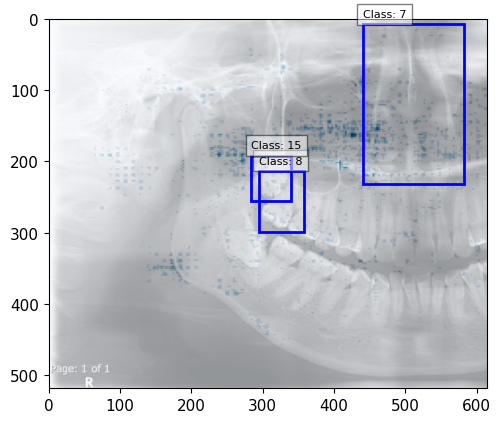

In [ ]:
selected_bboxes_E280_23Y_F_neg = plot_bboxes_on_image_neg(Image_E280_23Y_F_path, df_E280_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
import pandas as pd

def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.5):
    # Initialize an empty DataFrame to store NMS results
    df_nms = pd.DataFrame()

    # Get unique class IDs
    class_ids = df['class'].unique()

    for class_id in class_ids:
        # Filter detections by class
        df_class = df[df['class'] == class_id].copy()

        # Sort detections by confidence in descending order
        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        suppressed_indices = set()

        for i in range(len(df_class_sorted)):
            if i in suppressed_indices:
                continue

            for j in range(i+1, len(df_class_sorted)):
                if j in suppressed_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']].values
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']].values

                if compute_iou(boxA, boxB) > iou_threshold:
                    suppressed_indices.add(j)

        # Filter out suppressed detections
        df_nms_class = df_class_sorted.drop(index=list(suppressed_indices)).reset_index(drop=True)

        # Append results for this class to the main DataFrame
        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms

# Example usage:
# Assuming 'df' is your DataFrame containing the detections
# result_df = nms_per_class(df)

In [ ]:
import pandas as pd

def compute_iou(boxA, boxB):
    # Determine the coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    # Compute the area of intersection
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

    # Compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)

    return iou

def nms_per_class(df, iou_threshold=0.5):
    # Initialize an empty DataFrame to store NMS results
    df_nms = pd.DataFrame()

    # Get unique class IDs
    class_ids = df['class'].unique()

    for class_id in class_ids:
        # Filter detections by class
        df_class = df[df['class'] == class_id].copy()

        # Sort detections by decreasing confidence
        df_class_sorted = df_class.sort_values(by='confidence', ascending=False).reset_index(drop=True)
        suppressed_indices = set()

        for i in range(len(df_class_sorted)):
            if i in suppressed_indices:
                continue

            for j in range(i+1, len(df_class_sorted)):
                if j in suppressed_indices:
                    continue

                boxA = df_class_sorted.iloc[i][['xmin', 'ymin', 'xmax', 'ymax']].values
                boxB = df_class_sorted.iloc[j][['xmin', 'ymin', 'xmax', 'ymax']].values

                if compute_iou(boxA, boxB) > iou_threshold:
                    suppressed_indices.add(j)

        # Filter out suppressed detections
        df_nms_class = df_class_sorted.drop(index=list(suppressed_indices)).reset_index(drop=True)

        # Append results for this class to the main DataFrame
        df_nms = pd.concat([df_nms, df_nms_class], ignore_index=True)

    return df_nms


In [ ]:
pd.DataFrame(selected_bboxes_E280_23Y_F_pos[0])

xmin        ymin        xmax        ymax  confidence  class  \
0  236.695343  290.763547  309.928915  355.339473    0.922571     11   
1  294.389374  213.171515  358.350446  298.902530    0.917285      8   
2  440.287448    7.844324  581.963315  231.269573    0.916526      7   
3  283.981902  191.998364  340.139653  255.737803    0.861424     15   

                 name  iou  
0   Lower Third Molar  1.0  
1  Upper Second Molar  1.0  
2               Nasal  1.0  
3   Upper Third Molar  1.0

#### FlipE283_23Y_F

In [ ]:
#FlipE283_23Y_F
data= [np.array(shap_values_FlipE283_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

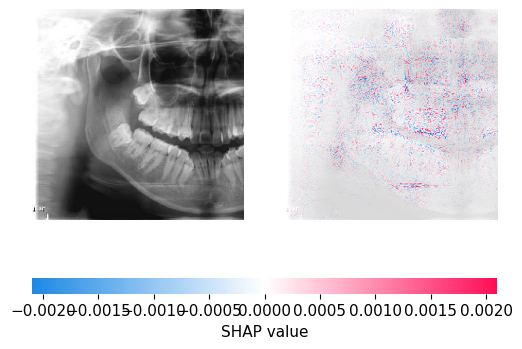

In [ ]:
shap.image_plot(shap_values_FlipE283_23Y_F, background_test_array[[627]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

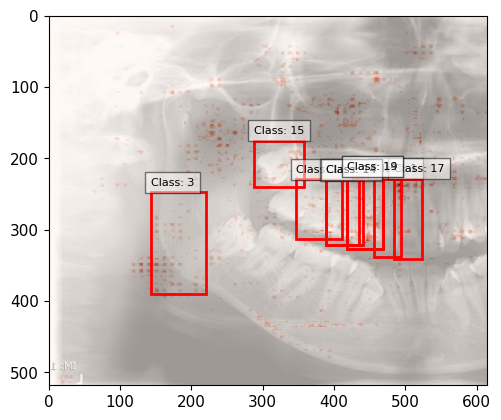

In [ ]:
selected_bboxes_FlipE283_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE283_23Y_F_path, df_FlipE283_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE283_23Y_F_pos)

0  \
0  {'xmin': 346.96577274799347, 'ymin': 229.45843309164047, 'xmax': 411.2310594320297, 'ymax': 313.131831407547, 'confidence': 0.8928593397140503, 'class': 10, 'name': 'Upper First Molar', 'iou': 1.0}   
1                                                                                                                                                                                                0.15625   

                                                                                                                                                                                                     1  \
0  {'xmin': 287.2374839782715, 'ymin': 175.3858203291893, 'xmax': 358.01225066185, 'ymax': 240.69648319482803, 'confidence': 0.8800443410873413, 'class': 15, 'name': 'Upper Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                             0.123342   

                                                                                                                                                                                                        2  \
0  {'xmin': 143.08384570479393, 'ymin': 247.62673193216324, 'xmax': 220.97583550214767, 'ymax': 390.55780160427094, 'confidence': 0.8778191208839417, 'class': 3, 'name': 'Mandibular angle', 'iou': 1.0}   
1                                                                                                                                                                                                0.105386   

                                                                                                                                                                                                          3  \
0  {'xmin': 455.80614626407623, 'ymin': 228.2170182466507, 'xmax': 494.1812926530838, 'ymax': 338.4598743915558, 'confidence': 0.8643255829811096, 'class': 1, 'name': 'Upper Lateral Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                  0.193452   

                                                                                                                                                                                                           4  \
0  {'xmin': 483.8574640750885, 'ymin': 228.51933282613754, 'xmax': 522.4864490032196, 'ymax': 341.52819061279297, 'confidence': 0.858235776424408, 'class': 17, 'name': 'Upper Central Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                   0.172012   

                                                                                                                                                                                                           5  \
0  {'xmin': 388.15059995651245, 'ymin': 230.5007028579712, 'xmax': 434.5825947523117, 'ymax': 321.5072867870331, 'confidence': 0.8235538005828857, 'class': 18, 'name': 'Upper Second Premolar', 'iou': 1.0}   
1                                                                                                                                                                                                   0.227941   

                                                                                                                                                                                                          6  \
0  {'xmin': 418.4171860218048, 'ymin': 225.42870926856995, 'xmax': 469.1042335033417, 'ymax': 326.6382828950882, 'confidence': 0.6621816158294678, 'class': 14, 'name': 'Upper First Premolar', 'iou': 1.0}   
1                                                                            

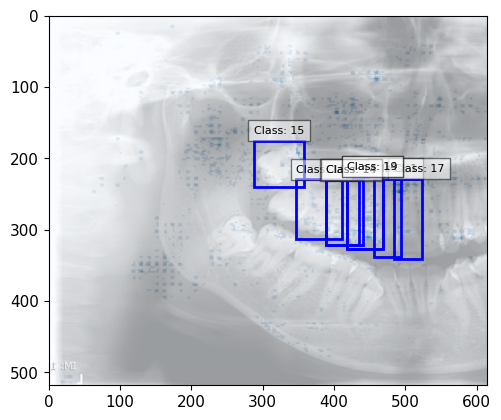

In [ ]:
selected_bboxes_FlipE283_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE283_23Y_F_path, df_FlipE283_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE283_23Y_F_neg)

0  \
0  {'xmin': 346.96577274799347, 'ymin': 229.45843309164047, 'xmax': 411.2310594320297, 'ymax': 313.131831407547, 'confidence': 0.8928593397140503, 'class': 10, 'name': 'Upper First Molar', 'iou': 1.0}   
1                                                                                                                                                                                               0.157407   

                                                                                                                                                                                                     1  \
0  {'xmin': 287.2374839782715, 'ymin': 175.3858203291893, 'xmax': 358.01225066185, 'ymax': 240.69648319482803, 'confidence': 0.8800443410873413, 'class': 15, 'name': 'Upper Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                             0.122016   

                                                                                                                                                                                                          2  \
0  {'xmin': 455.80614626407623, 'ymin': 228.2170182466507, 'xmax': 494.1812926530838, 'ymax': 338.4598743915558, 'confidence': 0.8643255829811096, 'class': 1, 'name': 'Upper Lateral Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                  0.175595   

                                                                                                                                                                                                           3  \
0  {'xmin': 483.8574640750885, 'ymin': 228.51933282613754, 'xmax': 522.4864490032196, 'ymax': 341.52819061279297, 'confidence': 0.858235776424408, 'class': 17, 'name': 'Upper Central Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                   0.161808   

                                                                                                                                                                                                           4  \
0  {'xmin': 388.15059995651245, 'ymin': 230.5007028579712, 'xmax': 434.5825947523117, 'ymax': 321.5072867870331, 'confidence': 0.8235538005828857, 'class': 18, 'name': 'Upper Second Premolar', 'iou': 1.0}   
1                                                                                                                                                                                                   0.202941   

                                                                                                                                                                                                          5  \
0  {'xmin': 418.4171860218048, 'ymin': 225.42870926856995, 'xmax': 469.1042335033417, 'ymax': 326.6382828950882, 'confidence': 0.6621816158294678, 'class': 14, 'name': 'Upper First Premolar', 'iou': 1.0}   
1                                                                                                                                                                                                   0.27512   

                                                                                                                                                                                                                           6  \
0  {'xmin': 388.74457335472107, 'ymin': 230.1893264055252, 'xmax': 439.86646938323975, 'ymax': 320.98799669742584, 'confidence': 0.2749447524547577, 'class': 14, 'name': 'Upper First Premolar', 'iou': 0.9004188837066511}   
1                                    

#### FlipE109_23Y_F

In [ ]:
#FlipE109_23Y_F
data= [np.array(shap_values_FlipE109_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

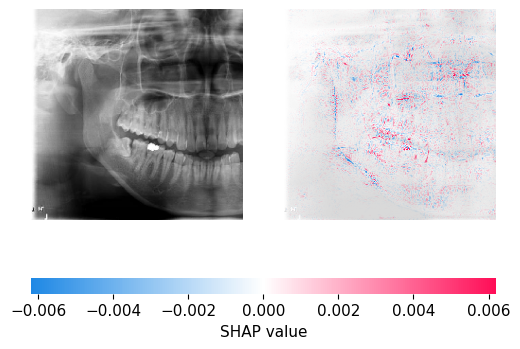

In [ ]:
shap.image_plot(shap_values_FlipE109_23Y_F, background_test_array[[634]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

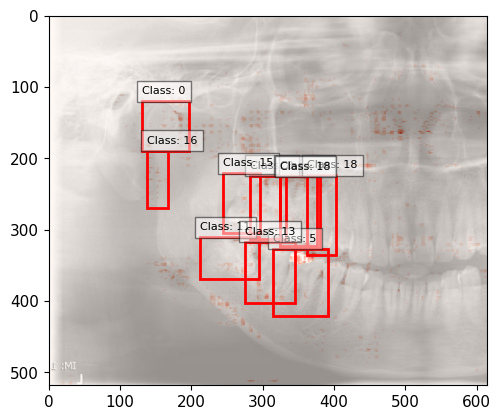

In [ ]:
selected_bboxes_FlipE109_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE109_23Y_F_path, df_FlipE109_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE109_23Y_F_pos)

0  \
0  {'xmin': 314.7879683971405, 'ymin': 326.4654743671417, 'xmax': 391.6412824392319, 'ymax': 421.17140197753906, 'confidence': 0.9265553951263428, 'class': 5, 'name': 'Lower First Molar', 'iou': 1.0}   
1                                                                                                                                                                                              0.132404   

                                                                                                                                                                                                         1  \
0  {'xmin': 212.62985050678253, 'ymin': 310.51271855831146, 'xmax': 294.3547894358635, 'ymax': 369.09187638759613, 'confidence': 0.9227032661437988, 'class': 11, 'name': 'Lower Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                                    0.136   

                                                                                                                                                                                                        2  \
0  {'xmin': 282.4181199669838, 'ymin': 224.28763884305954, 'xmax': 332.33792436122894, 'ymax': 313.2062715291977, 'confidence': 0.9167028665542603, 'class': 8, 'name': 'Upper Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                0.226496   

                                                                                                                                                                                                       3  \
0  {'xmin': 244.4065489768982, 'ymin': 220.90862542390823, 'xmax': 296.4426626563072, 'ymax': 304.7054936885834, 'confidence': 0.9150037169456482, 'class': 15, 'name': 'Upper Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                               0.135965   

                                                                                                                                                                                                       4  \
0  {'xmin': 323.5327719449997, 'ymin': 224.43409538269043, 'xmax': 375.6904799938202, 'ymax': 323.27804160118103, 'confidence': 0.914789617061615, 'class': 10, 'name': 'Upper First Molar', 'iou': 1.0}   
1                                                                                                                                                                                               0.203008   

                                                                                                                                                                                                          5  \
0  {'xmin': 274.9478523135185, 'ymin': 317.17546451091766, 'xmax': 345.33086371421814, 'ymax': 403.11755752563477, 'confidence': 0.9120613932609558, 'class': 13, 'name': 'Lower Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                  0.171892   

                                                                                                                                                                                              6  \
0  {'xmin': 130.94859039783478, 'ymin': 119.96135982871056, 'xmax': 196.11449885368347, 'ymax': 190.3378952741623, 'confidence': 0.9065573215484619, 'class': 0, 'name': 'Condyle', 'iou': 1.0}   
1                                                                                                                  

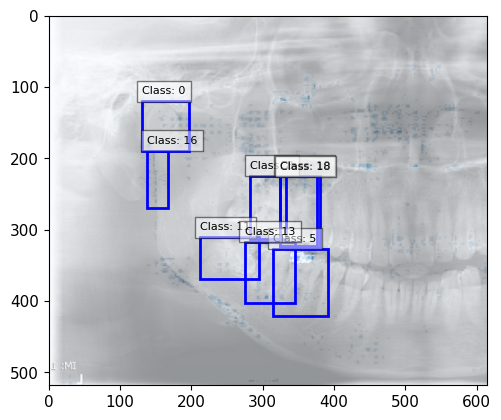

In [ ]:
selected_bboxes_FlipE109_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE109_23Y_F_path, df_FlipE109_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE109_23Y_F_neg)

0  \
0  {'xmin': 314.7879683971405, 'ymin': 326.4654743671417, 'xmax': 391.6412824392319, 'ymax': 421.17140197753906, 'confidence': 0.9265553951263428, 'class': 5, 'name': 'Lower First Molar', 'iou': 1.0}   
1                                                                                                                                                                                               0.13676   

                                                                                                                                                                                                         1  \
0  {'xmin': 212.62985050678253, 'ymin': 310.51271855831146, 'xmax': 294.3547894358635, 'ymax': 369.09187638759613, 'confidence': 0.9227032661437988, 'class': 11, 'name': 'Lower Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                                 0.114667   

                                                                                                                                                                                                        2  \
0  {'xmin': 282.4181199669838, 'ymin': 224.28763884305954, 'xmax': 332.33792436122894, 'ymax': 313.2062715291977, 'confidence': 0.9167028665542603, 'class': 8, 'name': 'Upper Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                0.169516   

                                                                                                                                                                                                       3  \
0  {'xmin': 323.5327719449997, 'ymin': 224.43409538269043, 'xmax': 375.6904799938202, 'ymax': 323.27804160118103, 'confidence': 0.914789617061615, 'class': 10, 'name': 'Upper First Molar', 'iou': 1.0}   
1                                                                                                                                                                                               0.150376   

                                                                                                                                                                                                          4  \
0  {'xmin': 274.9478523135185, 'ymin': 317.17546451091766, 'xmax': 345.33086371421814, 'ymax': 403.11755752563477, 'confidence': 0.9120613932609558, 'class': 13, 'name': 'Lower Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                  0.154595   

                                                                                                                                                                                              5  \
0  {'xmin': 130.94859039783478, 'ymin': 119.96135982871056, 'xmax': 196.11449885368347, 'ymax': 190.3378952741623, 'confidence': 0.9065573215484619, 'class': 0, 'name': 'Condyle', 'iou': 1.0}   
1                                                                                                                                                                                      0.126344   

                                                                                                                                                                                                                           6  \
0  {'xmin': 324.68313336372375, 'ymin': 225.3559209704399, 'xmax': 379.95274233818054, 'ymax': 325.0398734807968, 'confidence': 0.2920406758785248, 'class': 18, 'name': 'Upper Second Premolar', 'iou': 0.8960685973968733}   
1                                                                                   

#### FlipE150_23Y_F

In [ ]:
#FlipE150_23Y_F
data= [np.array(shap_values_FlipE150_23Y_F)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

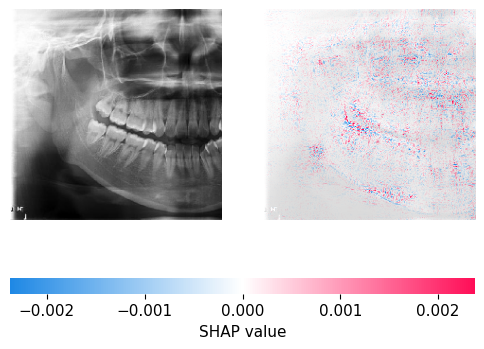

In [ ]:
shap.image_plot(shap_values_FlipE150_23Y_F, background_test_array[[642]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

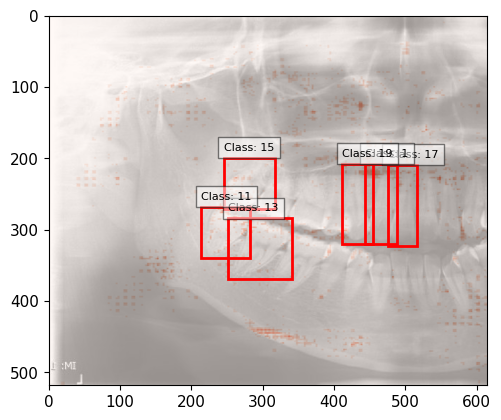

In [ ]:
selected_bboxes_FlipE150_23Y_F_pos = plot_bboxes_on_image_pos(Image_FlipE150_23Y_F_path, df_FlipE150_23Y_F_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE150_23Y_F_pos)

0  \
0  {'xmin': 251.65569603443146, 'ymin': 283.9267270565033, 'xmax': 340.9414259195328, 'ymax': 369.1046587228775, 'confidence': 0.9332951307296753, 'class': 13, 'name': 'Lower Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                0.131859   

                                                                                                                                                                                                         1  \
0  {'xmin': 214.07621049880981, 'ymin': 268.0773723125458, 'xmax': 281.49019664525986, 'ymax': 339.46739411354065, 'confidence': 0.9144601821899414, 'class': 11, 'name': 'Lower Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                                 0.159946   

                                                                                                                                                                                                         2  \
0  {'xmin': 245.34287136793137, 'ymin': 199.2672672867775, 'xmax': 316.77541875839233, 'ymax': 270.69135987758636, 'confidence': 0.9116476774215698, 'class': 15, 'name': 'Upper Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                                 0.133995   

                                                                                                                                                                                                            3  \
0  {'xmin': 475.27537190914154, 'ymin': 208.82961189746857, 'xmax': 516.5442630052567, 'ymax': 322.7037627696991, 'confidence': 0.8702369928359985, 'class': 17, 'name': 'Upper Central Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                     0.10068   

                                                                                                                                                                                                           4  \
0  {'xmin': 443.86567068099976, 'ymin': 207.92410385608673, 'xmax': 487.6003016233444, 'ymax': 320.6011303663254, 'confidence': 0.8655357360839844, 'class': 1, 'name': 'Upper Lateral Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                   0.131378   

                                                                                                                                                                                                   5  
0  {'xmin': 411.4065066576004, 'ymin': 207.58682310581207, 'xmax': 454.18488800525665, 'ymax': 320.3674359321594, 'confidence': 0.8361990451812744, 'class': 19, 'name': 'Upper Canine', 'iou': 1.0}  
1                                                                                                                                                                                           0.118367

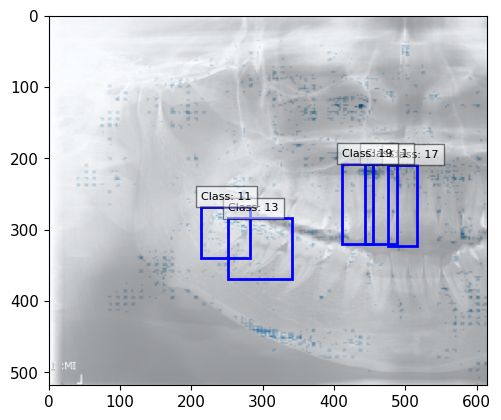

In [ ]:
selected_bboxes_FlipE150_23Y_F_neg = plot_bboxes_on_image_neg(Image_FlipE150_23Y_F_path, df_FlipE150_23Y_F_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE150_23Y_F_neg)

0  \
0  {'xmin': 251.65569603443146, 'ymin': 283.9267270565033, 'xmax': 340.9414259195328, 'ymax': 369.1046587228775, 'confidence': 0.9332951307296753, 'class': 13, 'name': 'Lower Second Molar', 'iou': 1.0}   
1                                                                                                                                                                                                0.128583   

                                                                                                                                                                                                         1  \
0  {'xmin': 214.07621049880981, 'ymin': 268.0773723125458, 'xmax': 281.49019664525986, 'ymax': 339.46739411354065, 'confidence': 0.9144601821899414, 'class': 11, 'name': 'Lower Third Molar', 'iou': 1.0}   
1                                                                                                                                                                                                 0.165323   

                                                                                                                                                                                                            2  \
0  {'xmin': 475.27537190914154, 'ymin': 208.82961189746857, 'xmax': 516.5442630052567, 'ymax': 322.7037627696991, 'confidence': 0.8702369928359985, 'class': 17, 'name': 'Upper Central Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                    0.115646   

                                                                                                                                                                                                           3  \
0  {'xmin': 443.86567068099976, 'ymin': 207.92410385608673, 'xmax': 487.6003016233444, 'ymax': 320.6011303663254, 'confidence': 0.8655357360839844, 'class': 1, 'name': 'Upper Lateral Incisor', 'iou': 1.0}   
1                                                                                                                                                                                                    0.13648   

                                                                                                                                                                                                   4  
0  {'xmin': 411.4065066576004, 'ymin': 207.58682310581207, 'xmax': 454.18488800525665, 'ymax': 320.3674359321594, 'confidence': 0.8361990451812744, 'class': 19, 'name': 'Upper Canine', 'iou': 1.0}  
1                                                                                                                                                                                            0.12517

### Male

#### เลือกรูปที่ต้องการหาค่า SHAP Value

In [ ]:
sdf_test[sdf_test['Age(year)']==23]

Age(year) Gender Folder_type Folder_name  \
620         23      F      Normal        Both   
621         23      F      Normal        Both   
622         23      F      Normal        Both   
623         23      F      Normal        Both   
624         23      F      Normal        Both   
625         23      F      Normal        Both   
626         23      F      Normal        Both   
627         23      F      Normal        Both   
628         23      F      Normal        Both   
629         23      F      Normal        Both   
630         23      F      Normal        Both   
631         23      F      Normal        Both   
632         23      F      Normal        Both   
633         23      F      Normal        Both   
634         23      F      Normal          Lt   
635         23      F      Normal          Lt   
636         23      F      Normal          Lt   
637         23      F      Normal          Lt   
638         23      F      Normal          Lt   
639         23      F      Normal          Lt   
640         23      F      Normal          Lt   
641         23      F      Normal          Lt   
642         23      F      Normal          Lt   
643         23      M      Normal        Both   
644         23      M      Normal        Both   
645         23      M      Normal        Both   
646         23      M      Normal        Both   
647         23      M      Normal          Lt   
648         23      M      Normal          Lt   
649         23      M      Normal          Lt   
650         23      M      Normal          Lt   
651         23      M      Normal          Lt   
652         23      M      Normal          Lt   
653         23      M      Normal          Lt   
654         23      M      Normal          Rt   
655         23      M      Normal          Rt   
656         23      M      Normal          Rt   
657         23      M      Normal          Rt   
658         23      M      Normal          Rt   
659         23      M      Normal          Rt   
660         23      M      Normal          Rt   
661         23      M      Normal          Rt   
662         23      M      Normal          Rt   
663         23      M      Normal          Rt   
664         23      M      Normal          Rt   
665         23      M      Normal          Rt   
666         23      M      Normal          Rt   
667         23      M    Abnormal          Rt   

                                                                                                 Path_Name  \
620      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E244.jpg   
621  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE244.jpg   
622      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E280.jpg   
623  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE280.jpg   
624      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E282.jpg   
625  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE282.jpg   
626      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E283.jpg   
627  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE283.jpg   
628      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E284.jpg   
629  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE284.jpg   
630      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E287.jpg   
631  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/FlipE287.jpg   
632      /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/F/Both/E297.jpg   
633  /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut

In [ ]:
from PIL import Image
Image_E411_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E411.jpg')
Image_E411_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E411.jpg'

Image_E412_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E412.jpg')
Image_E412_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E412.jpg'

Image_FlipE238_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE238.jpg')
Image_FlipE238_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE238.jpg'

Image_FlipE274_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE274.jpg')
Image_FlipE274_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE274.jpg'

Image_E15_23Y_M = Image.open('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Rt/E15.jpg')
Image_E15_23Y_M_path = '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Rt/E15.jpg'

In [ ]:
sdf_test.reset_index().iloc[643]

index                                                                                                               643
Age(year)                                                                                                            23
Gender                                                                                                                M
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E411.jpg
Filename                                                                                                       E411.jpg
Gender_Class                                                                                                          1
Gender_Predict                          

In [ ]:
sdf_test.reset_index().iloc[645]

index                                                                                                               645
Age(year)                                                                                                            23
Gender                                                                                                                M
Folder_type                                                                                                      Normal
Folder_name                                                                                                        Both
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Both/E412.jpg
Filename                                                                                                       E412.jpg
Gender_Class                                                                                                          1
Gender_Predict                          

In [ ]:
sdf_test.reset_index().iloc[647] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 647
Age(year)                                                                                                              23
Gender                                                                                                                  M
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE238.jpg
Filename                                                                                                     FlipE238.jpg
Gender_Class                                                                                                            1
Gender_Predict          

In [ ]:
sdf_test.reset_index().iloc[648] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                                 648
Age(year)                                                                                                              23
Gender                                                                                                                  M
Folder_type                                                                                                        Normal
Folder_name                                                                                                            Lt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Lt/FlipE274.jpg
Filename                                                                                                     FlipE274.jpg
Gender_Class                                                                                                            1
Gender_Predict          

In [ ]:
sdf_test.reset_index().iloc[654] # check ว่า ตรงไหนจากภาพที่เลทอกมา

index                                                                                                            654
Age(year)                                                                                                         23
Gender                                                                                                             M
Folder_type                                                                                                   Normal
Folder_name                                                                                                       Rt
Path_Name             /content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/23Y/M/Rt/E15.jpg
Filename                                                                                                     E15.jpg
Gender_Class                                                                                                       1
Gender_Predict                                                  

#### YOLO (detect ตห)

In [ ]:
# YOLO detect ตำแหน่ง
#ภาพ1
results_E411_23Y_M = yolo_model(Image_E411_23Y_M) # results = ผลจากการทำนาย
df_E411_23Y_M = results_E411_23Y_M.pandas().xyxyn[0] #.pandas ทำให้เป็น dataframe // .xyxy ตห.กล่อง ///  n normalization ค่าให้มีค่าอยู่ระหว่าง 0-1 //[0]= index
#ภาพ2
results_E412_23Y_M = yolo_model(Image_E412_23Y_M)
df_E412_23Y_M = results_E412_23Y_M.pandas().xyxyn[0]
#ภาพ3
results_FlipE238_23Y_M  = yolo_model(Image_FlipE238_23Y_M )
df_FlipE238_23Y_M  = results_FlipE238_23Y_M .pandas().xyxyn[0]
#ภาพ4
results_FlipE274_23Y_M = yolo_model(Image_FlipE274_23Y_M)
df_FlipE274_23Y_M = results_FlipE274_23Y_M.pandas().xyxyn[0]
#ภาพ5
results_E15_23Y_M = yolo_model(Image_E15_23Y_M)
df_E15_23Y_M= results_E15_23Y_M.pandas().xyxyn[0]

In [ ]:
results_E15_23Y_M

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 518x614 1 Condyle, 1 Upper Lateral Incisor, 1 Lower Lateral Incisor, 1 Mandibular angle, 1 Lower Central Incisor, 1 Lower First Molar, 2 Lower Second Premolars, 1 Nasal, 1 Upper Second Molar, 1 Lower Canine, 1 Upper First Molar, 1 Lower Third Molar, 1 Lower First Premolar, 1 Lower Second Molar, 1 Upper First Premolar, 1 Upper Third Molar, 1 Posterior border of Ramus, 1 Upper Central Incisor, 2 Upper Second Premolars, 1 Upper Canine
Speed: 5.8ms pre-process, 11.6ms inference, 2.1ms NMS per image at shape (1, 3, 544, 640)

In [ ]:
results_E411_23Y_M.pandas().xyxyn[0]

xmin      ymin      xmax      ymax  confidence  class  \
0   0.513981  0.616002  0.625613  0.791105    0.910451      5   
1   0.438808  0.433203  0.520799  0.588227    0.909739      8   
2   0.437097  0.586462  0.543219  0.761419    0.908496     13   
3   0.360076  0.579565  0.457323  0.728269    0.903869     11   
4   0.692083  0.008393  0.979896  0.412312    0.897470      7   
5   0.585027  0.630312  0.683579  0.814021    0.891786      6   
6   0.711368  0.634144  0.769496  0.839756    0.879616      9   
7   0.732276  0.434928  0.786653  0.627959    0.877120      1   
8   0.678012  0.410228  0.741983  0.629557    0.877003     19   
9   0.580184  0.462941  0.646860  0.621073    0.870470     18   
10  0.366839  0.428946  0.471789  0.576603    0.870187     15   
11  0.150462  0.159103  0.262142  0.318481    0.869820      0   
12  0.793717  0.637068  0.834452  0.798675    0.866858      4   
13  0.627442  0.457851  0.699175  0.630712    0.865274     14   
14  0.655488  0.635117  0.724098  0.824401    0.855071     12   
15  0.779564  0.424016  0.838923  0.635063    0.853595     17   
16  0.191747  0.472381  0.328731  0.754584    0.832397      3   
17  0.507802  0.451391  0.592899  0.611486    0.802168     10   
18  0.172970  0.315372  0.227375  0.468207    0.743063     16   
19  0.760732  0.636841  0.802149  0.802561    0.715294      2   
20  0.437022  0.588127  0.543828  0.765928    0.453996      5   
21  0.508081  0.457721  0.646894  0.609420    0.255014     18   

                         name  
0           Lower First Molar  
1          Upper Second Molar  
2          Lower Second Molar  
3           Lower Third Molar  
4                       Nasal  
5       Lower Second Premolar  
6                Lower Canine  
7       Upper Lateral Incisor  
8                Upper Canine  
9       Upper Second Premolar  
10          Upper Third Molar  
11                    Condyle  
12      Lower Central Incisor  
13       Upper First Premolar  
14       Lower First Premolar  
15      Upper Central Incisor  
16           Mandibular angle  
17          Upper First Molar  
18  Posterior border of Ramus  
19      Lower Lateral Incisor  
20          Lower First Molar  
21      Upper Second Premolar

##### NMS

In [ ]:
df_E411_23Y_M_filtered_nms = nms_per_class(df_E411_23Y_M,iou_threshold=0.5)
df_E412_23Y_M_filtered_nms = nms_per_class(df_E412_23Y_M,iou_threshold=0.5)
df_FlipE238_23Y_M_filtered_nms = nms_per_class(df_FlipE238_23Y_M ,iou_threshold=0.5)
df_FlipE274_23Y_M_filtered_nms = nms_per_class(df_FlipE274_23Y_M,iou_threshold=0.5)
df_E15_23Y_M_filtered_nms = nms_per_class(df_E15_23Y_M,iou_threshold=0.5)

#### SHAP values

In [ ]:
explainer_layer2

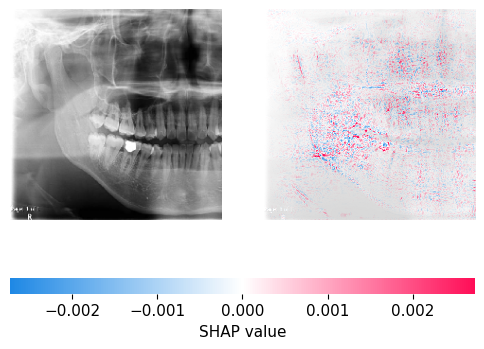

In [ ]:
shap_values_E411_23Y_M = explainer_layer2.shap_values(background_test_array[[643]])
%matplotlib inline
shap.image_plot(shap_values_E411_23Y_M, background_test_array[[643]])

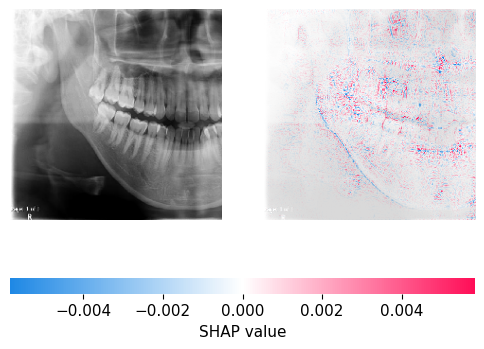

In [ ]:
shap_values_E412_23Y_M = explainer_layer2.shap_values(background_test_array[[645]])
%matplotlib inline
shap.image_plot(shap_values_E412_23Y_M, background_test_array[[645]])

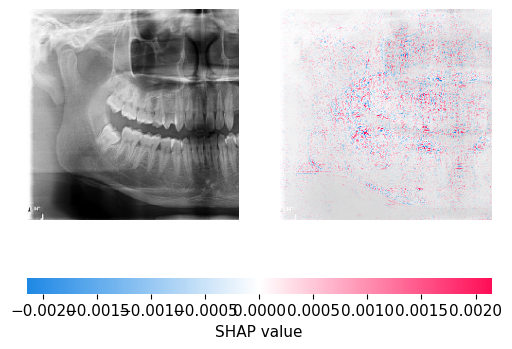

In [ ]:
shap_values_FlipE238_23Y_M  = explainer_layer2.shap_values(background_test_array[[647]])
%matplotlib inline
shap.image_plot(shap_values_FlipE238_23Y_M , background_test_array[[647]])

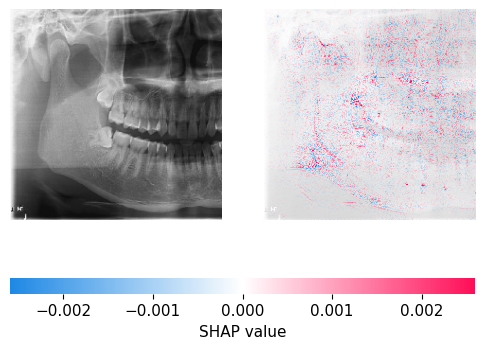

In [ ]:
shap_values_FlipE274_23Y_M = explainer_layer2.shap_values(background_test_array[[648]])
%matplotlib inline
shap.image_plot(shap_values_FlipE274_23Y_M, background_test_array[[648]])

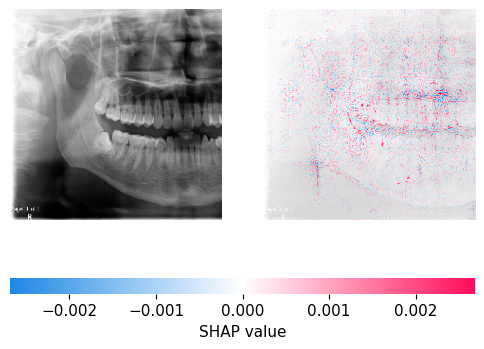

In [ ]:
shap_values_E15_23Y_M = explainer_layer2.shap_values(background_test_array[[654]])
%matplotlib inline
shap.image_plot(shap_values_E15_23Y_M, background_test_array[[654]])

#### convert shap value from RGB to grayscale image

In [ ]:
type(shap_values_FlipE274_23Y_M)

list

#### E411_23Y_M

In [ ]:
#E411_23Y_M
data= [np.array(shap_values_E411_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

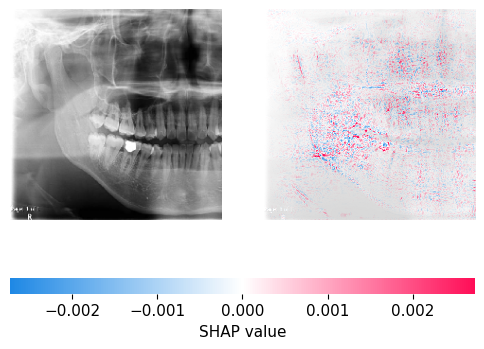

In [ ]:
shap.image_plot(shap_values_E411_23Y_M, background_test_array[[643]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

KeyError: 'iou'

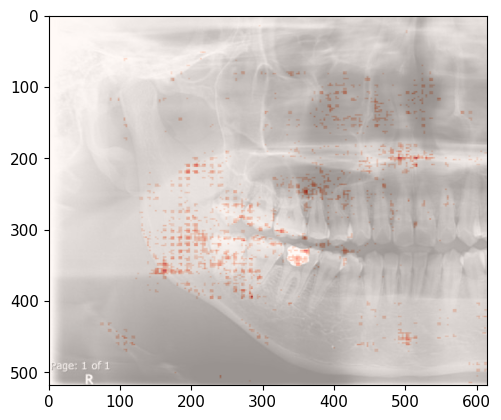

In [ ]:
selected_bboxes_E411_23Y_M_pos = plot_bboxes_on_image_pos(Image_E411_23Y_M_path, df_E411_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E411_23Y_M_pos)

In [ ]:
selected_bboxes_E411_23Y_M_neg = plot_bboxes_on_image_neg(Image_E411_23Y_M_path, df_E411_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E411_23Y_M_neg)

#### E412_23Y_M

In [ ]:
#E412_23Y_M
data= [np.array(shap_values_E412_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_E412_23Y_M, background_test_array[[645]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E412_23Y_M_pos = plot_bboxes_on_image_pos(Image_E412_23Y_M_path, df_E412_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E412_23Y_M_pos)

In [ ]:
selected_bboxes_E412_23Y_M_neg = plot_bboxes_on_image_neg(Image_E412_23Y_M_path, df_E412_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E412_23Y_M_neg)

#### FlipE238_23Y_M

In [ ]:
#FlipE238_23Y_M
data= [np.array(shap_values_FlipE238_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE238_23Y_M, background_test_array[[647]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE238_23Y_M_pos = plot_bboxes_on_image_pos(Image_FlipE238_23Y_M_path, df_FlipE238_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE238_23Y_M_pos)

In [ ]:
selected_bboxes_FlipE238_23Y_M_neg = plot_bboxes_on_image_neg(Image_FlipE238_23Y_M_path, df_FlipE238_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE238_23Y_M_neg)

#### FlipE274_23Y_M

In [ ]:
#FlipE274_23Y_M
data= [np.array(shap_values_FlipE274_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_FlipE274_23Y_M, background_test_array[[648]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_FlipE274_23Y_M_pos = plot_bboxes_on_image_pos(Image_FlipE274_23Y_M_path, df_FlipE274_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_FlipE274_23Y_M_pos)

In [ ]:
selected_bboxes_FlipE274_23Y_M_neg = plot_bboxes_on_image_neg(Image_FlipE274_23Y_M_path, df_FlipE274_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_FlipE274_23Y_M_neg)

#### E15_23Y_M

In [ ]:
#E15_23Y_M
data= [np.array(shap_values_E15_23Y_M)] # change list to array
image_array = data[0] # index ใน list ที่ เก็บ array
positive =np.where(image_array >= 0, image_array, 0) #แยก positve กับ negative ค่าที่เป็น negative จะเติม 0
negative = np.where(image_array < 0, image_array, 0)#แยก negative  กับ positve ค่าที่เป็น positve จะเติม 0
negative_aps =  np.abs(negative)

flattened_array_pos = positive.flatten()
flattened_array_neg = negative_aps.flatten()

normalized_array_pos = (flattened_array_pos - np.min(flattened_array_pos)) / (np.max(flattened_array_pos) - np.min(flattened_array_pos))
normalized_array_neg = (flattened_array_neg - np.min(flattened_array_neg)) / (np.max(flattened_array_neg) - np.min(flattened_array_neg))

normalized_positive = normalized_array_pos.reshape(positive.shape)
normalized_neg = normalized_array_neg.reshape(negative_aps.shape)


grayscale_image_pos = normalized_positive/ 3.0
grayscale_image_neg = normalized_neg/ 3.0

grayscale_image_positive = np.mean(grayscale_image_pos, axis=4)
grayscale_image_negative = np.mean(grayscale_image_neg, axis=4)

grayscale_image_positive = grayscale_image_positive.squeeze()
grayscale_image_negative = grayscale_image_negative.squeeze()

##### more than 95 percentaile

In [ ]:
percentile_95_pos = np.percentile(grayscale_image_positive, 95) # เลือกค่า grayscale_image ที่มี percentaile more than 95
percentile_95_neg = np.percentile(grayscale_image_negative, 95)

grayscale_pos_thresholded = grayscale_image_positive
grayscale_neg_thresholded = grayscale_image_negative


grayscale_pos_thresholded[grayscale_pos_thresholded < percentile_95_pos] = 0 #ถ้ามีค่าน้อยกว่า 95 จะให้เป็น 0
grayscale_neg_thresholded[grayscale_neg_thresholded < percentile_95_neg] = 0

In [ ]:
shap.image_plot(shap_values_E15_23Y_M, background_test_array[[654]])

plot_bboxes_on_image_pos(image_path, img_nms, grayscale_thresholded_>95)

In [ ]:
selected_bboxes_E15_23Y_M_pos = plot_bboxes_on_image_pos(Image_E15_23Y_M_path, df_E15_23Y_M_filtered_nms, grayscale_pos_thresholded)
%matplotlib inline

In [ ]:
pd.DataFrame(selected_bboxes_E15_23Y_M_pos)

In [ ]:
selected_bboxes_E15_23Y_M_neg = plot_bboxes_on_image_neg(Image_E15_23Y_M_path, df_E15_23Y_M_filtered_nms, grayscale_neg_thresholded)

In [ ]:
pd.DataFrame(selected_bboxes_E15_23Y_M_neg)